In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [2]:
import pandas as pd
import plotly.express as px

# to hide/ignore warnings
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# ignore UserWarning
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sklearn is scikit-learn
from sklearn import datasets

# ignore warnings
import warnings

# Ignore RuntimeWarning and FutureWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Ignore ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Data Cleaning and Preperation
- Using Pandas for this stage

In [ ]:
# For Aliyah to access files from drive
years = ['2020', '2021', '2022']
df_ = {}
for year in years:
  file_path = pd.read_csv(f"/content/drive/MyDrive/Term Project CIS/FinalProj/{year}.csv")
  df_[year] = pd.read_csv(file_path)

FileNotFoundError: ignored

In [ ]:
# For Emma to access files from drive
years = ['2020', '2021', '2022']
df_ = {}

for year in years:
    file_path = f"/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/{year}.csv"
    df_[year] = pd.read_csv(file_path)

In [ ]:
df_['2020'].columns

Index(['ACCIDENT_KEY', 'ON_ROAD_KDOT_TYPE', 'ON_ROAD_SPEED_LIMIT',
       'ON_ROAD_SURFACE_TYPE', 'ON_ROAD_SURFACE_COND', 'ON_ROAD_SURFACE_CHAR',
       'ON_ROAD_CONST_MAINT', 'ON_ROAD_NBR_OF_LANES', 'TIME_OF_ACCIDENT',
       'DAY_OF_ACCIDENT', 'ACCIDENT_CLASS_FHE', 'ACCIDENT_CLASS_MHE',
       'ACCIDENT_LOCATION', 'LIGHT_CONDITIONS', 'WEATHER_CONDITIONS',
       'KDOT_WORK_ZONE_FLAG', 'DUI_FLAG', 'NBR_OF_TRAFFIC_UNITS',
       'NBR_OF_VEHICLES', 'NBR_OF_OCCUPANTS', 'NBR_OF_PEDESTRIANS',
       'NBR_OF_FATALITIES', 'NBR_OF_DISABLED', 'NBR_OF_NON_INCAPACITATING',
       'NBR_POSSIBLE', 'ALCOHOL_INVOLVEMENT', 'DRUG_INVOLVEMENT',
       'ACCIDENT_SEVERITY', 'TRAFFIC_UNIT_NBR', 'DAMAGE_AREA_NBR',
       'DAMAGE_AREA_CODE', 'year'],
      dtype='object')

In [ ]:
for year in df_:
    df_[year] = df_[year].dropna(axis=0, how='any')
    df_[year] = df_[year].drop('DAMAGE_AREA_NBR', axis=1)


## Model Preperation: variable encoding and continued data cleaning

In [ ]:
for year in df_:
  print(year)
  for col in df_[year]:
    print(col, df_[year][col].unique(), 'number:', df_[year][col].nunique())

2020
ACCIDENT_KEY [20200000001 20200000002 20200000003 ... 20200129434 20200129437
 20200129438] number: 49830
ON_ROAD_KDOT_TYPE ['RD' 'HWY' 'RAMP' 'ST' 'FWY' 'TER' 'DR' 'AVE' 'EXPY' 'LN' 'PKWY' 'BLVD'
 'SQ' 'TRFY' 'WAY' 'CT' 'PL' 'TRL' 'XING' 'CIR' 'PK' 'LNDG' 'EST'] number: 23
ON_ROAD_SPEED_LIMIT [15. 25. 30. 45. 65. 55. 60. 35. 70. 40. 50. 75. 20. 10.  5.  3. 12. 33.
  6. 76. 34. 62.  4. 36. 56. 14.] number: 26
ON_ROAD_SURFACE_TYPE [ 2  1  3  5  4 99 88] number: 7
ON_ROAD_SURFACE_COND [ 1  8  4  3  2  5 99  7 88  6] number: 10
ON_ROAD_SURFACE_CHAR [ 2  4  1  5  3 99  6 88] number: 8
ON_ROAD_CONST_MAINT [ 0 99  3  2  1] number: 5
ON_ROAD_NBR_OF_LANES [ 2  4  3  5  1 99 88] number: 7
TIME_OF_ACCIDENT [1900.  304. 1129. ...  301.  237.  342.] number: 1439
DAY_OF_ACCIDENT ['WE' 'TH' 'FR' 'SA' 'SU' 'MO' 'TU'] number: 7
ACCIDENT_CLASS_FHE [ 4  3  7  8  0  1  2  9  6 99  5] number: 11
ACCIDENT_CLASS_MHE [ 4  3  7  8  1  0  2  9  6 99  5] number: 11
ACCIDENT_LOCATION [11 15 13 12 21 22 20 1

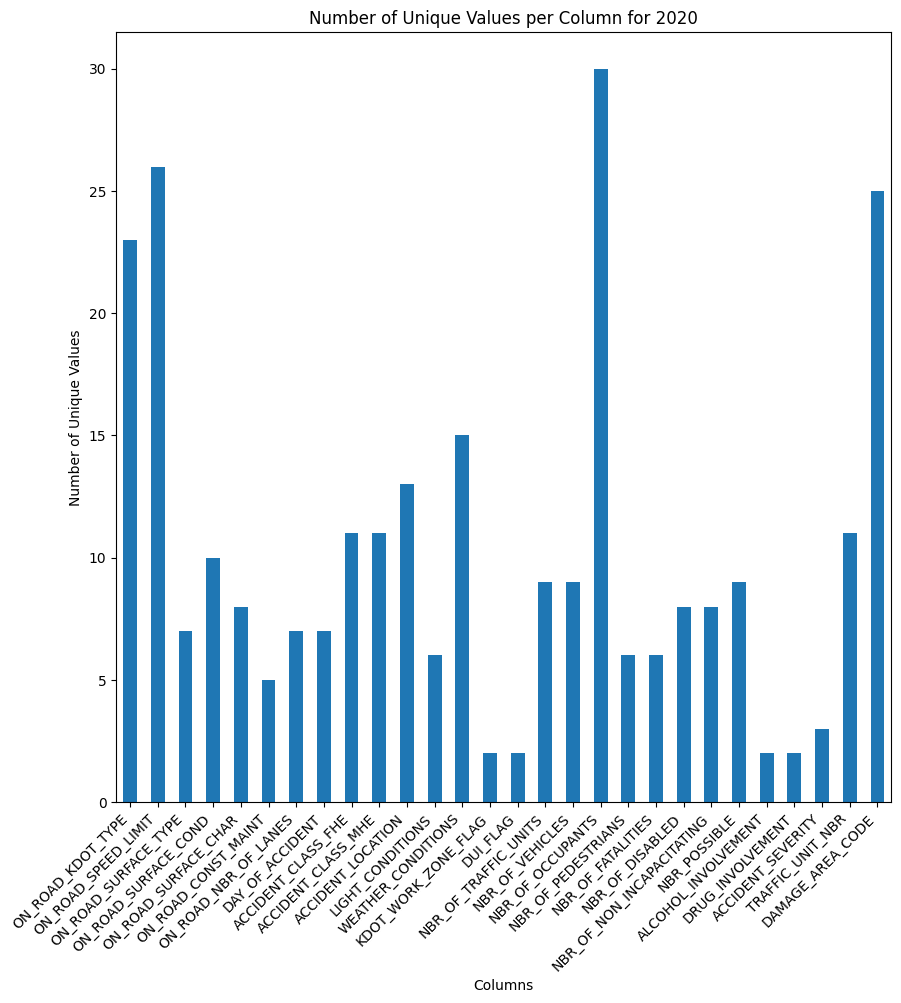

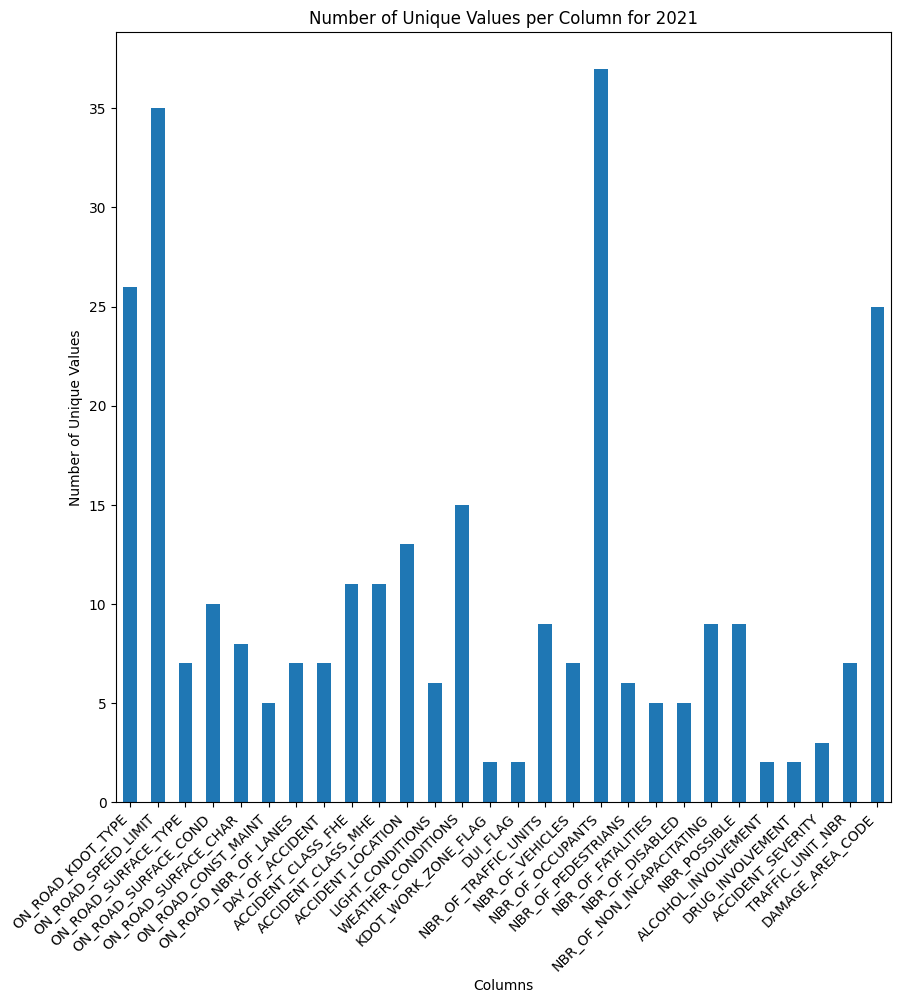

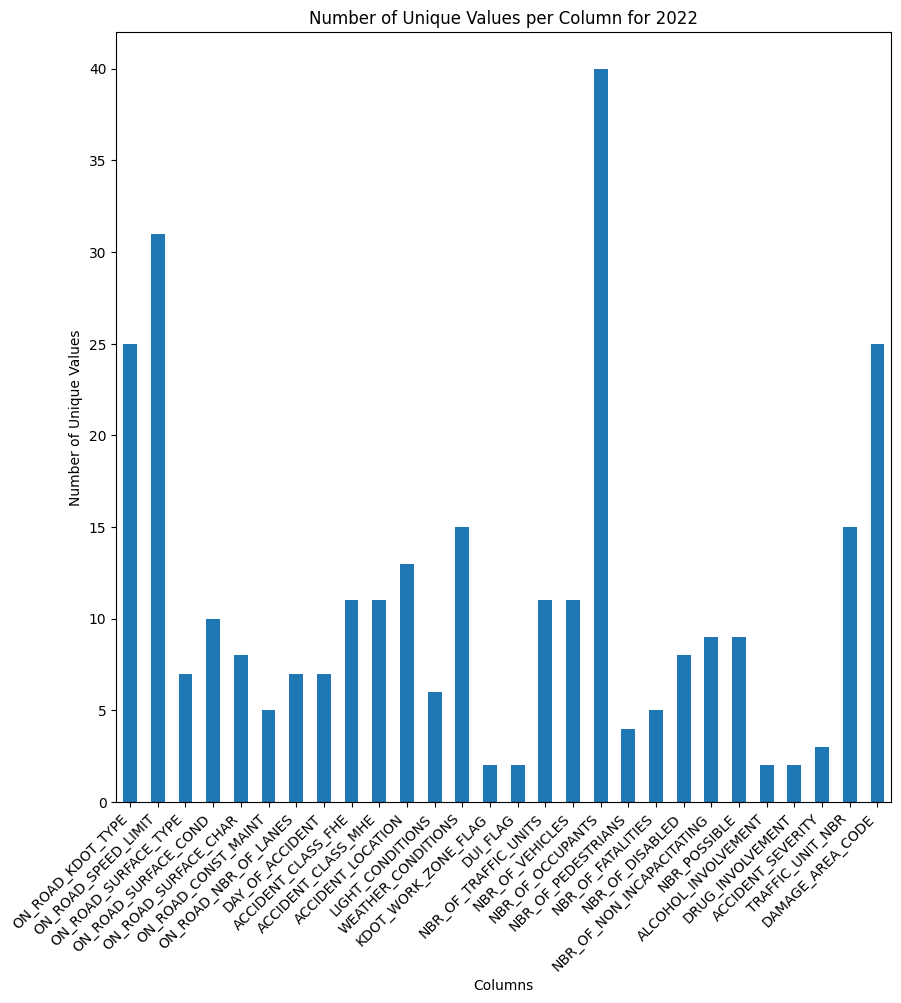

In [ ]:
for year, df in df_.items():
    n_unique = df.drop(['ACCIDENT_KEY', 'year', 'TIME_OF_ACCIDENT'], axis=1).nunique()

    plt.figure(figsize=(10, 10))  # Set the figure size (width, height)
    n_unique.plot(kind='bar')  # Create a bar plot

    plt.title(f'Number of Unique Values per Column for {year}')
    plt.xlabel('Columns')
    plt.ylabel('Number of Unique Values')

    plt.xticks(rotation=45, ha='right')
    plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of unique column values for {year}.png')

    plt.show()


### Encoding columns based on above results



In [ ]:
cate_columns = ['ON_ROAD_KDOT_TYPE','ON_ROAD_SURFACE_TYPE', 'ON_ROAD_SURFACE_COND', 'ON_ROAD_SURFACE_CHAR',
                'ON_ROAD_CONST_MAINT', 'ON_ROAD_NBR_OF_LANES', 'DAY_OF_ACCIDENT', 'ACCIDENT_CLASS_FHE', 'ACCIDENT_CLASS_MHE','ACCIDENT_LOCATION', 'LIGHT_CONDITIONS', 'WEATHER_CONDITIONS', 'ALCOHOL_INVOLVEMENT', 'DRUG_INVOLVEMENT','TRAFFIC_UNIT_NBR','DAMAGE_AREA_CODE']

df_encoded_ = {}
for year in df_:
  df_encoded_[year]=pd.get_dummies(df_[year], columns=cate_columns, drop_first = True)
  print(df_encoded_[year].columns)

Index(['ACCIDENT_KEY', 'ON_ROAD_SPEED_LIMIT', 'TIME_OF_ACCIDENT',
       'KDOT_WORK_ZONE_FLAG', 'DUI_FLAG', 'NBR_OF_TRAFFIC_UNITS',
       'NBR_OF_VEHICLES', 'NBR_OF_OCCUPANTS', 'NBR_OF_PEDESTRIANS',
       'NBR_OF_FATALITIES',
       ...
       'DAMAGE_AREA_CODE_17', 'DAMAGE_AREA_CODE_3A', 'DAMAGE_AREA_CODE_3B',
       'DAMAGE_AREA_CODE_6A', 'DAMAGE_AREA_CODE_6B', 'DAMAGE_AREA_CODE_6C',
       'DAMAGE_AREA_CODE_88', 'DAMAGE_AREA_CODE_99', 'DAMAGE_AREA_CODE_9A',
       'DAMAGE_AREA_CODE_9B'],
      dtype='object', length=162)
Index(['ACCIDENT_KEY', 'ON_ROAD_SPEED_LIMIT', 'TIME_OF_ACCIDENT',
       'KDOT_WORK_ZONE_FLAG', 'DUI_FLAG', 'NBR_OF_TRAFFIC_UNITS',
       'NBR_OF_VEHICLES', 'NBR_OF_OCCUPANTS', 'NBR_OF_PEDESTRIANS',
       'NBR_OF_FATALITIES',
       ...
       'DAMAGE_AREA_CODE_17', 'DAMAGE_AREA_CODE_3A', 'DAMAGE_AREA_CODE_3B',
       'DAMAGE_AREA_CODE_6A', 'DAMAGE_AREA_CODE_6B', 'DAMAGE_AREA_CODE_6C',
       'DAMAGE_AREA_CODE_88', 'DAMAGE_AREA_CODE_99', 'DAMAGE_AREA_CODE_9A',
 

In [ ]:
bin_cols = []
sev_mapping = {'N': 0, 'I':1, 'F': 2}

for year in df_encoded_:
  df_encoded_[year]['KDOT_WORK_ZONE_FLAG'] = df_[year]['KDOT_WORK_ZONE_FLAG'].apply(lambda x: 1 if x == 'Y' else 0)
  df_encoded_[year]['DUI_FLAG'] = df_[year]['DUI_FLAG'].apply(lambda x: 1 if x == 'Y' else 0)
  df_encoded_[year]['ACCIDENT_SEVERITY'] = df_[year]['ACCIDENT_SEVERITY'].map(sev_mapping)


In [ ]:
df_encoded_['2020'].describe()

,ACCIDENT_KEY,ON_ROAD_SPEED_LIMIT,TIME_OF_ACCIDENT,KDOT_WORK_ZONE_FLAG,DUI_FLAG,NBR_OF_TRAFFIC_UNITS,NBR_OF_VEHICLES,NBR_OF_OCCUPANTS,NBR_OF_PEDESTRIANS,NBR_OF_FATALITIES,...,DAMAGE_AREA_CODE_17,DAMAGE_AREA_CODE_3A,DAMAGE_AREA_CODE_3B,DAMAGE_AREA_CODE_6A,DAMAGE_AREA_CODE_6B,DAMAGE_AREA_CODE_6C,DAMAGE_AREA_CODE_88,DAMAGE_AREA_CODE_99,DAMAGE_AREA_CODE_9A,DAMAGE_AREA_CODE_9B
count,3.320950e+05,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,...,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000,332095.000000
mean,2.020007e+10,48.172535,1345.446935,0.010702,0.062633,1.689631,1.681805,2.305539,0.007826,0.025652,...,0.007137,0.030859,0.026736,0.040808,0.041365,0.017905,0.003207,0.005044,0.026760,0.032241
std,5.084061e+04,15.137403,575.936541,0.102894,0.242301,0.715044,0.709156,1.540222,0.106979,0.197155,...,0.084176,0.172935,0.161312,0.197845,0.199133,0.132605,0.056539,0.070840,0.161383,0.176639
min,2.020000e+10,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.020001e+10,35.000000,913.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.020010e+10,45.000000,1431.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.020012e+10,65.000000,1800.000000,0.000000,0.000000,2.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.020013e+10,76.000000,2359.000000,1.000000,1.000000,11.000000,11.000000,67.000000,5.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_encoded_['2021'].describe()

,ACCIDENT_KEY,ON_ROAD_SPEED_LIMIT,TIME_OF_ACCIDENT,KDOT_WORK_ZONE_FLAG,DUI_FLAG,NBR_OF_TRAFFIC_UNITS,NBR_OF_VEHICLES,NBR_OF_OCCUPANTS,NBR_OF_PEDESTRIANS,NBR_OF_FATALITIES,...,DAMAGE_AREA_CODE_17,DAMAGE_AREA_CODE_3A,DAMAGE_AREA_CODE_3B,DAMAGE_AREA_CODE_6A,DAMAGE_AREA_CODE_6B,DAMAGE_AREA_CODE_6C,DAMAGE_AREA_CODE_88,DAMAGE_AREA_CODE_99,DAMAGE_AREA_CODE_9A,DAMAGE_AREA_CODE_9B
count,3.523860e+05,352386.000000,352386.000000,352386.000000,352386.000000,352386.000000,352386.000000,352386.000000,352386.000000,352386.000000,...,352386.000000,352386.000000,352386.000000,352386.000000,352386.000000,352386.00000,352386.000000,352386.000000,352386.000000,352386.000000
mean,2.021007e+10,48.357523,1352.694199,0.009169,0.055277,1.735520,1.727571,2.362092,0.007949,0.024414,...,0.006989,0.030495,0.026363,0.042638,0.042834,0.01880,0.002948,0.004773,0.026423,0.031273
std,4.887310e+04,15.223929,561.842142,0.095315,0.228521,0.715809,0.700612,1.581347,0.139797,0.185510,...,0.083311,0.171945,0.160213,0.202040,0.202482,0.13582,0.054220,0.068923,0.160389,0.174054
min,2.021000e+10,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.021002e+10,35.000000,930.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2.021010e+10,45.000000,1441.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,2.021011e+10,65.000000,1749.000000,0.000000,0.000000,2.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,2.021013e+10,78.000000,2359.000000,1.000000,1.000000,43.000000,7.000000,58.000000,42.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_encoded_['2022'].describe()

,ACCIDENT_KEY,ON_ROAD_SPEED_LIMIT,TIME_OF_ACCIDENT,KDOT_WORK_ZONE_FLAG,DUI_FLAG,NBR_OF_TRAFFIC_UNITS,NBR_OF_VEHICLES,NBR_OF_OCCUPANTS,NBR_OF_PEDESTRIANS,NBR_OF_FATALITIES,...,DAMAGE_AREA_CODE_17,DAMAGE_AREA_CODE_3A,DAMAGE_AREA_CODE_3B,DAMAGE_AREA_CODE_6A,DAMAGE_AREA_CODE_6B,DAMAGE_AREA_CODE_6C,DAMAGE_AREA_CODE_88,DAMAGE_AREA_CODE_99,DAMAGE_AREA_CODE_9A,DAMAGE_AREA_CODE_9B
count,3.564810e+05,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,...,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000,356481.000000
mean,2.022007e+10,47.979323,1345.184874,0.006920,0.050255,1.752346,1.744194,2.388394,0.008152,0.022498,...,0.006808,0.030145,0.026734,0.042799,0.043231,0.018758,0.003347,0.006912,0.026414,0.030894
std,5.023683e+04,15.256277,556.234312,0.082901,0.218471,0.751920,0.748463,1.728158,0.097579,0.173716,...,0.082231,0.170986,0.161304,0.202404,0.203377,0.135671,0.057753,0.082851,0.160363,0.173030
min,2.022000e+10,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.022002e+10,35.000000,915.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.022010e+10,45.000000,1435.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.022012e+10,65.000000,1745.000000,0.000000,0.000000,2.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.022013e+10,95.000000,2359.000000,1.000000,1.000000,15.000000,15.000000,64.000000,3.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for year in df_:
  df_[year] = df_[year].dropna(axis=0)

# Data Exploration and Understanding

- matplotlib, plotly, and seaborn used for visuals

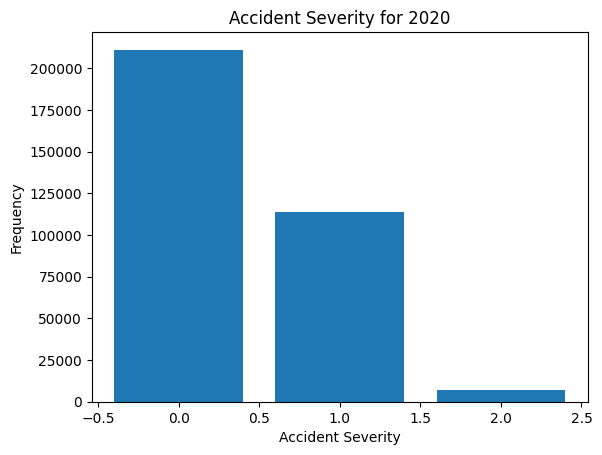

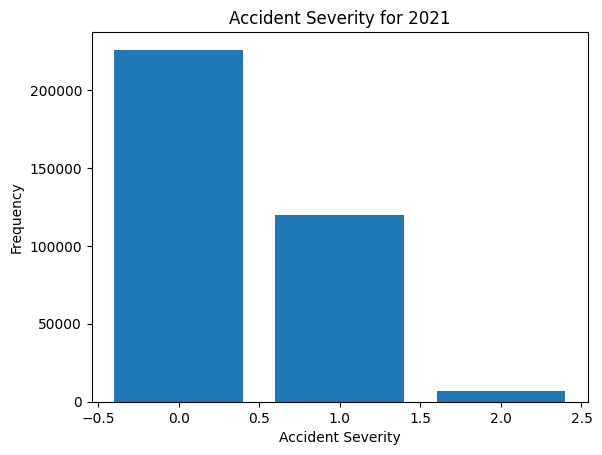

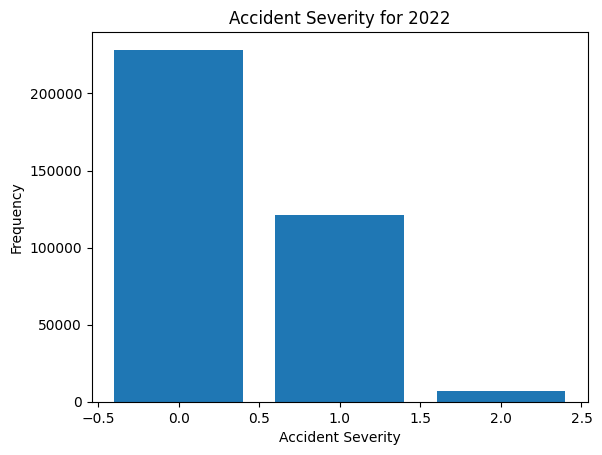

In [ ]:
for year in df_encoded_:
    severity_counts = df_encoded_[year]['ACCIDENT_SEVERITY'].value_counts()

    plt.bar(severity_counts.index, severity_counts.values)

    plt.title('Accident Severity for ' + year)
    plt.xlabel('Accident Severity')
    plt.ylabel('Frequency')
    plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Accident Severity for {year}.png')

    plt.show()

In [ ]:
import plotly.express as px

for year in df_encoded_:
    grouped_data = df_encoded_[year].groupby(['ACCIDENT_SEVERITY', 'DUI_FLAG']).size().reset_index(name='count')

    fig = px.bar(grouped_data, x="ACCIDENT_SEVERITY", y="count", color="DUI_FLAG",
                 title='Accident Severity based on DUI in ' + year,
                 labels={'count': 'Frequency'})
    #fig.write_image(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Accident Severity based on DUI in {year}.png')

    fig.show()


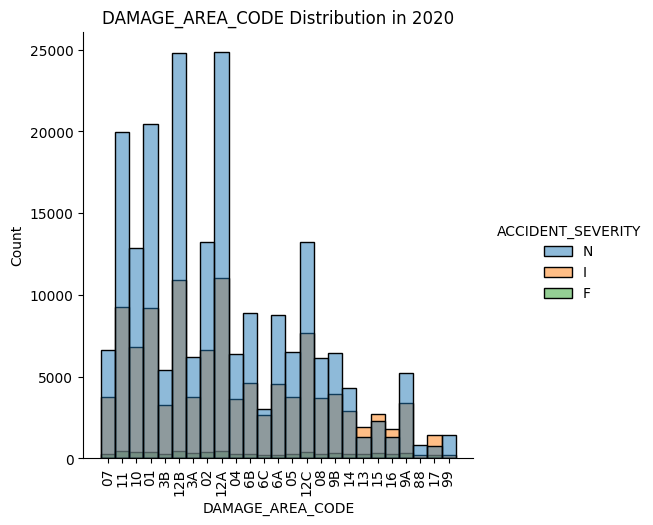

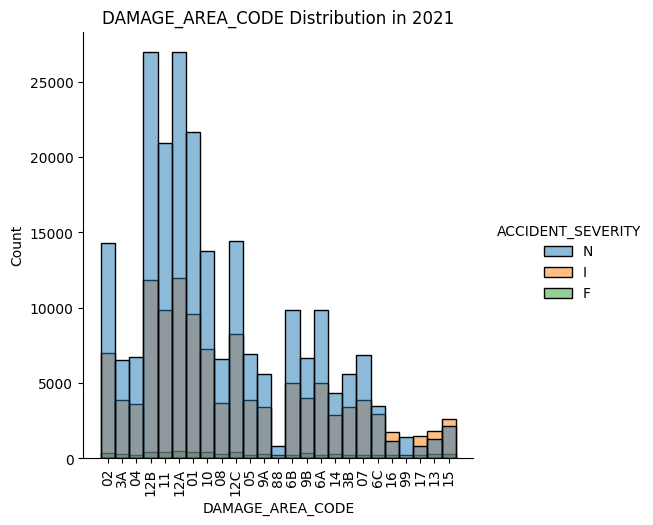

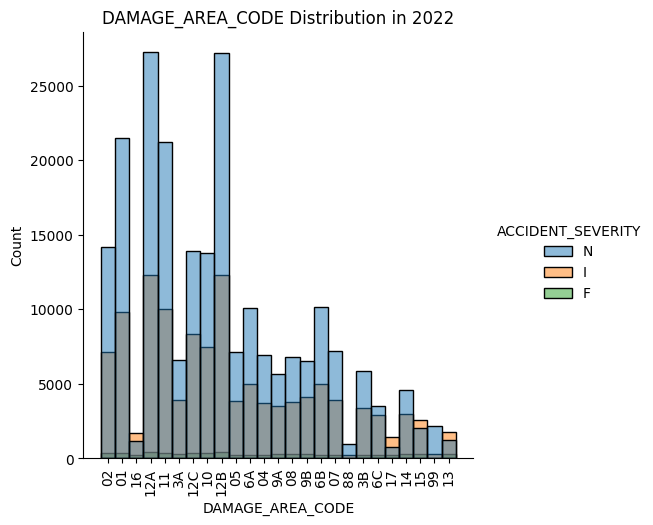

In [ ]:
for year in df_:
    sns.displot(data=df_[year], x='DAMAGE_AREA_CODE', hue="ACCIDENT_SEVERITY", kind='hist')
    plt.title('DAMAGE_AREA_CODE Distribution in ' + str(year))
    plt.xticks(rotation=90)
    plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of DAMAGE_AREA_CODE Distribution in {year}.png')


    plt.show()

for year 2020


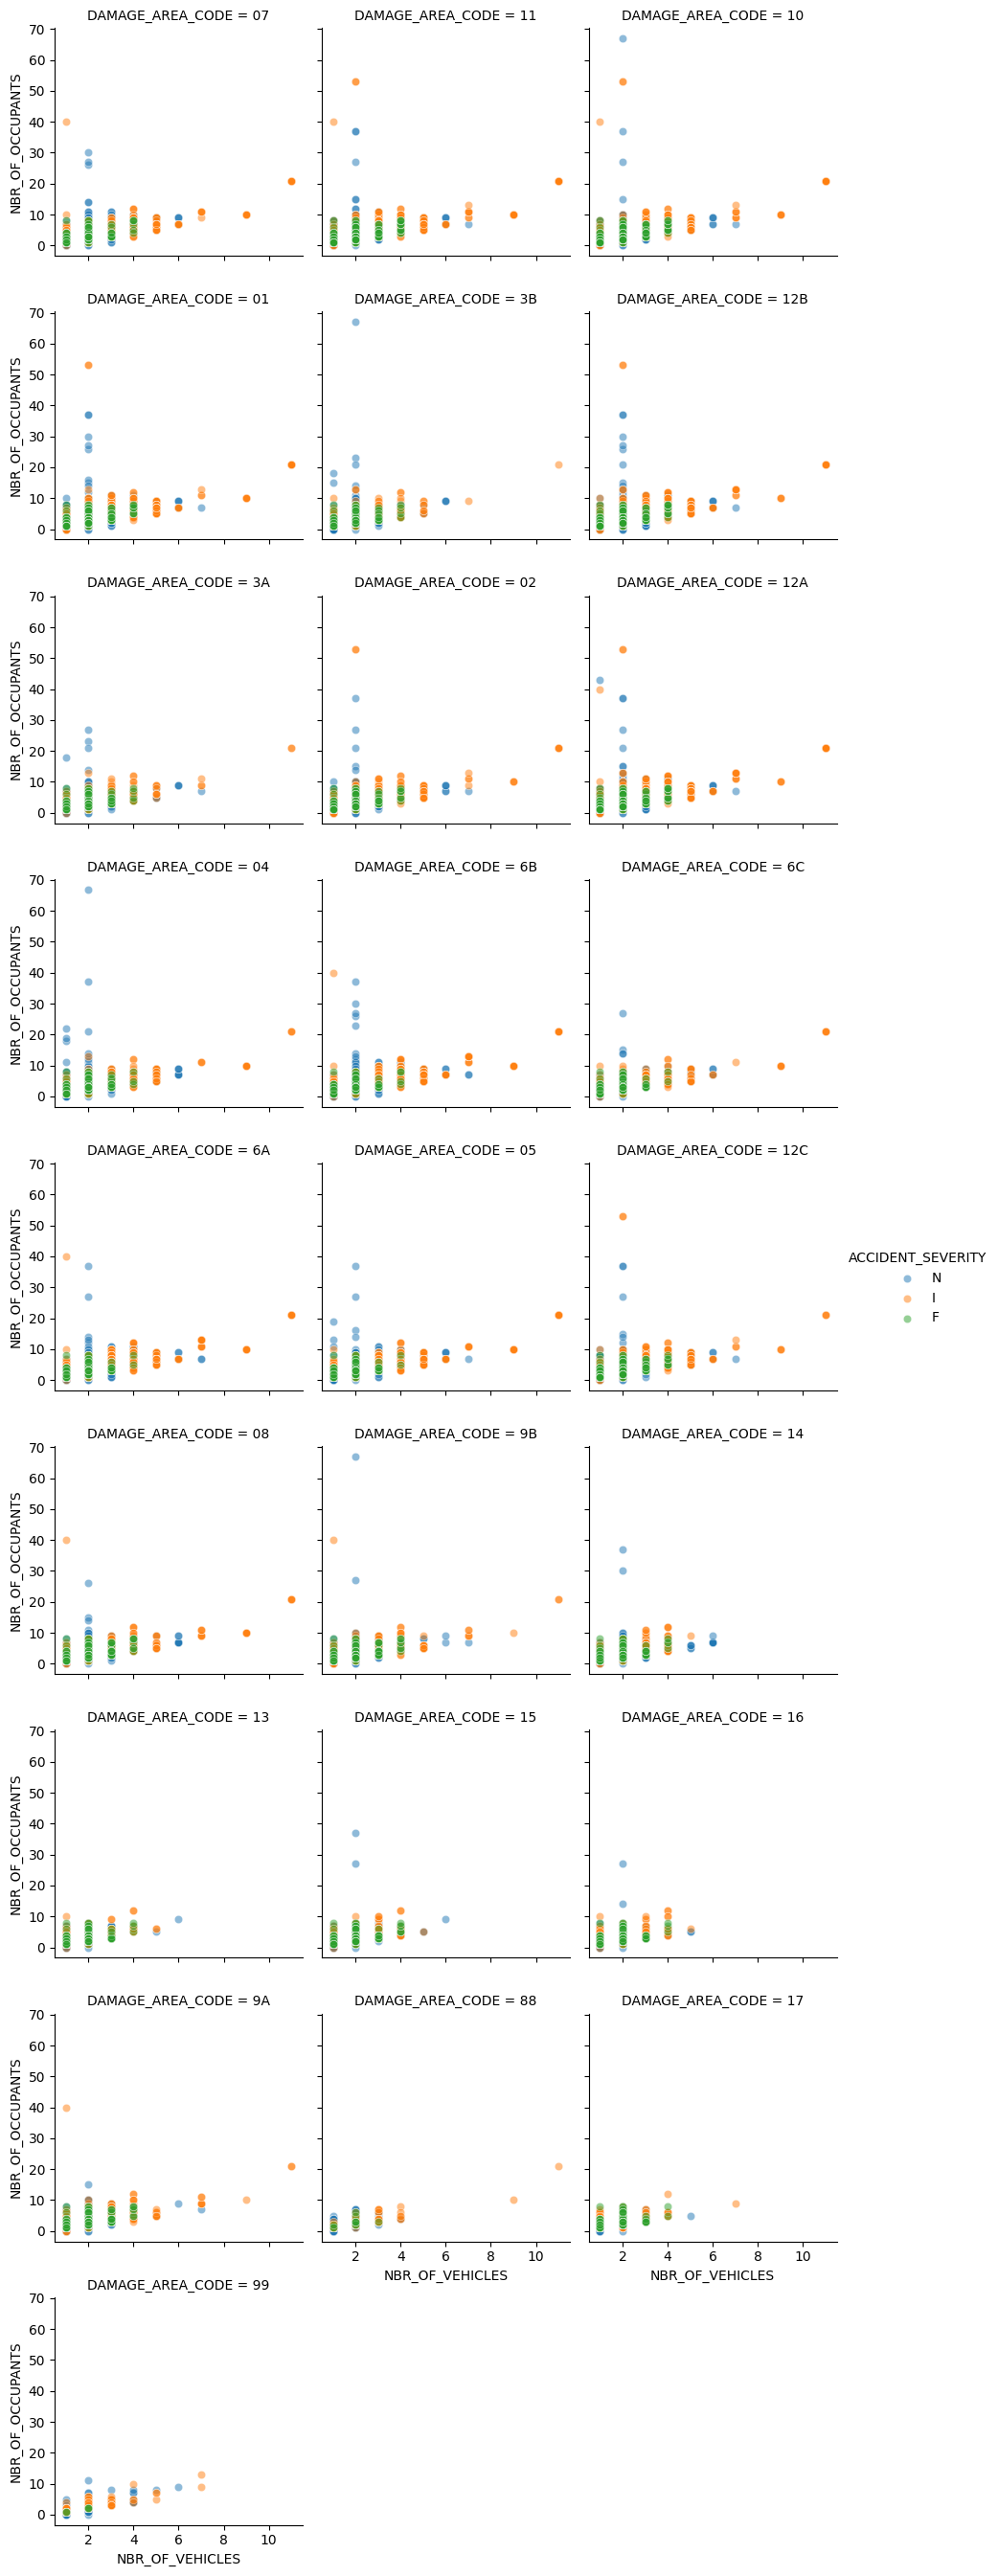

for year 2021


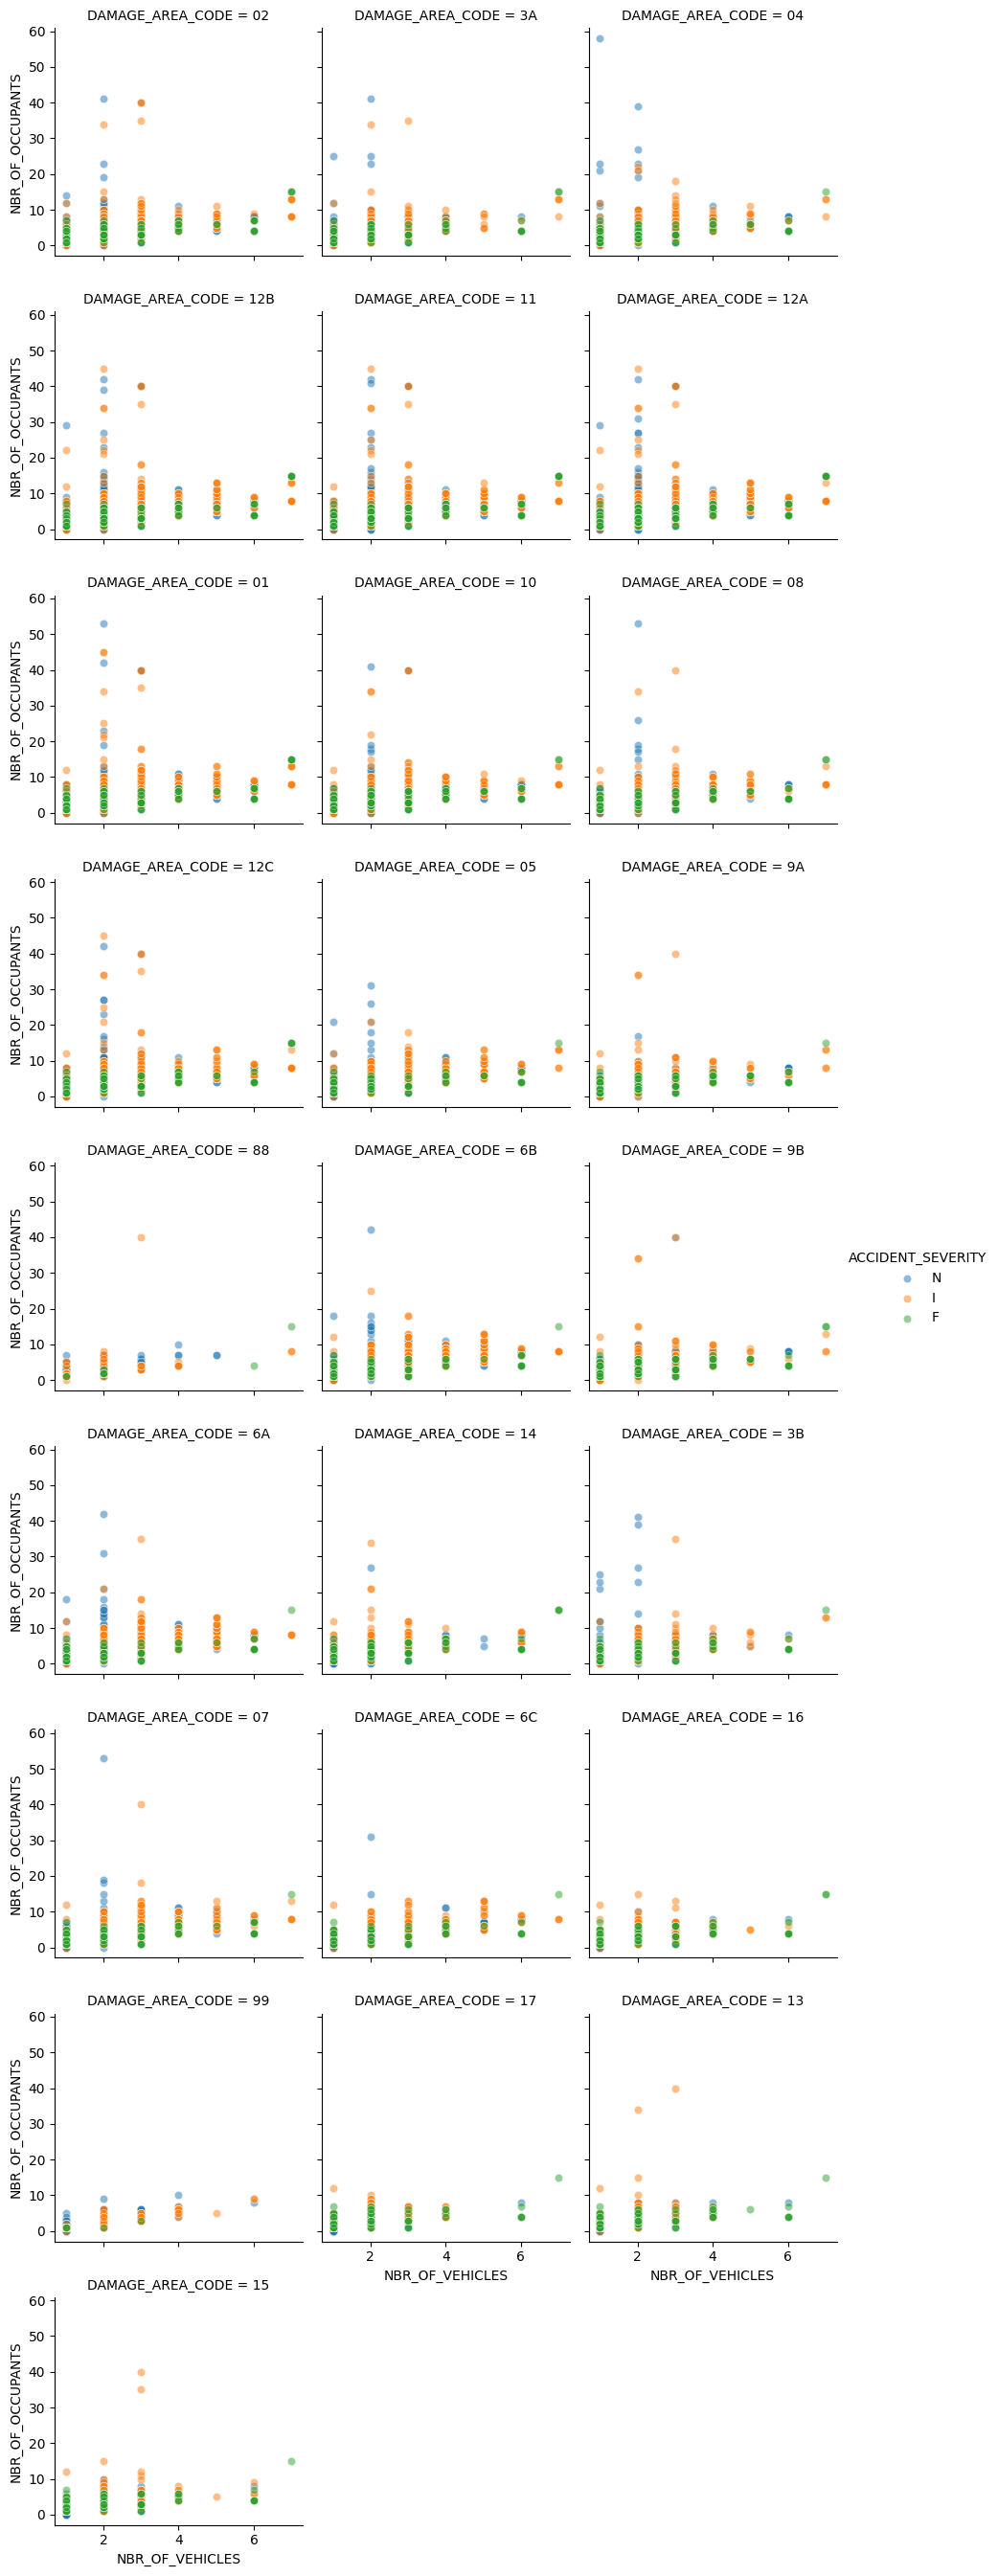

for year 2022


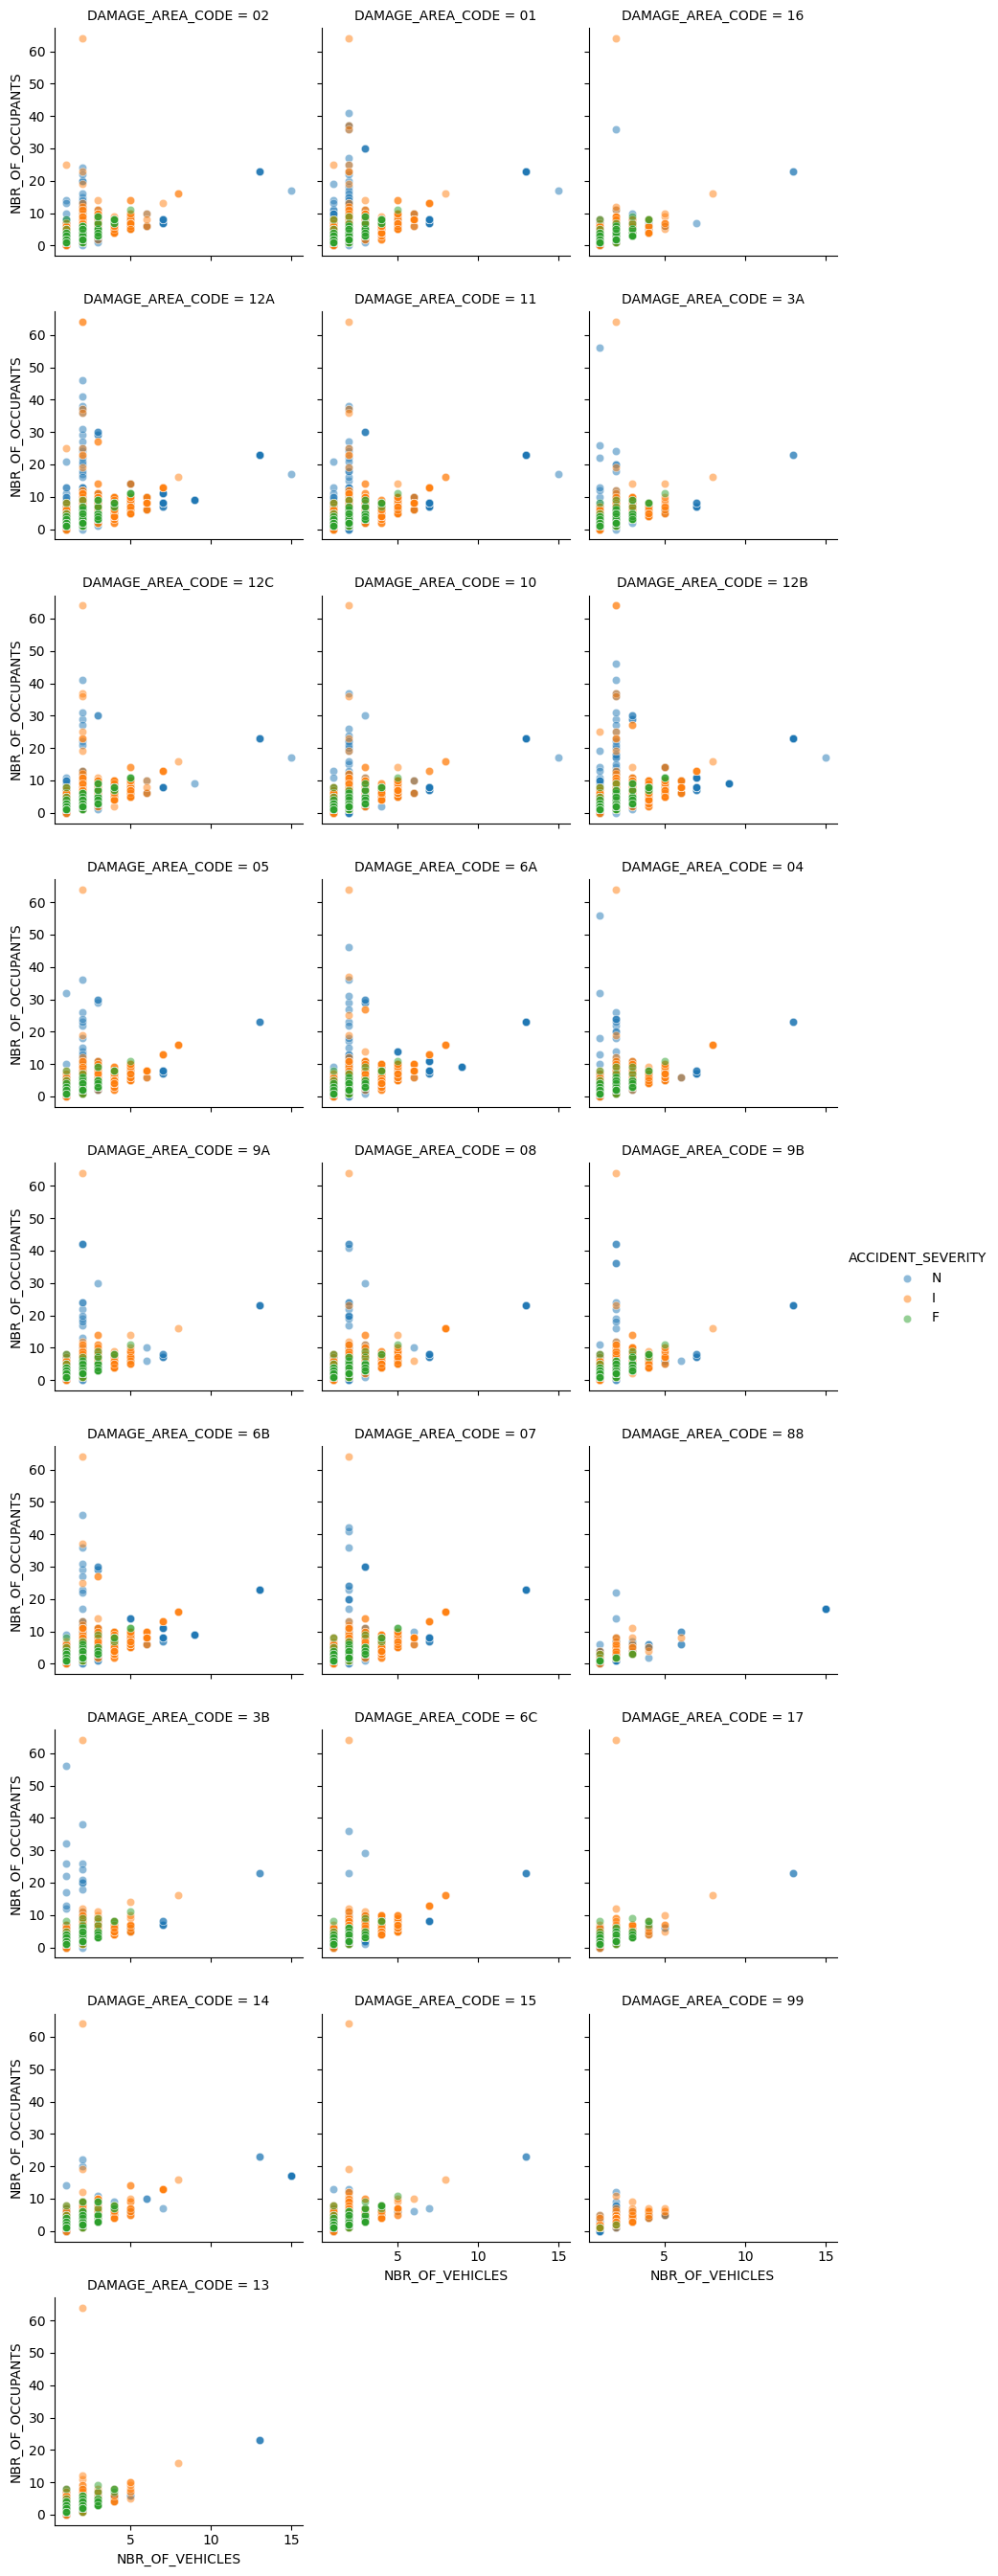

In [ ]:
for year in df_:
  print('for year', year)
  g = sns.FacetGrid(data = df_[year], col = 'DAMAGE_AREA_CODE', hue = "ACCIDENT_SEVERITY",
                    col_wrap = 3)
  g.map(sns.scatterplot, 'NBR_OF_VEHICLES','NBR_OF_OCCUPANTS', alpha = .5)
  g.add_legend()
  #plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Accident Severity  for {year}.png')

  plt.show()

for year 2020


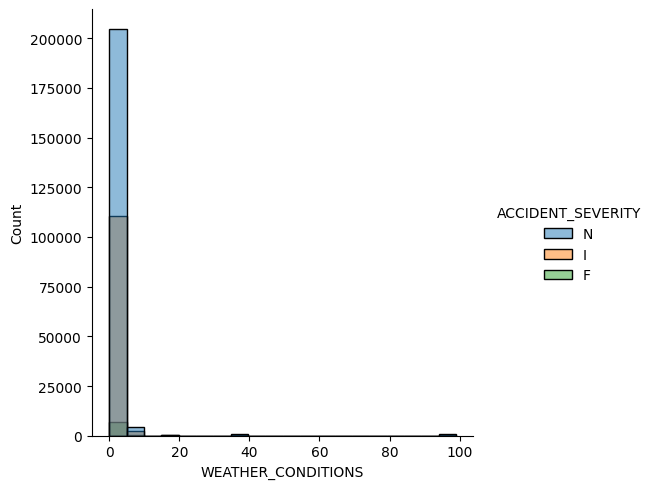

for year 2021


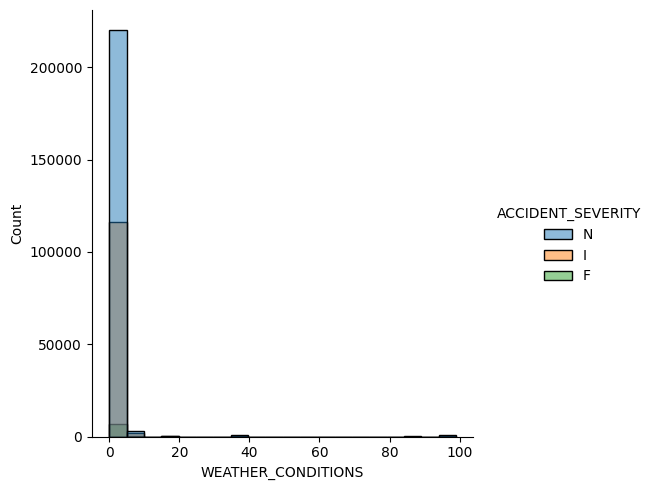

for year 2022


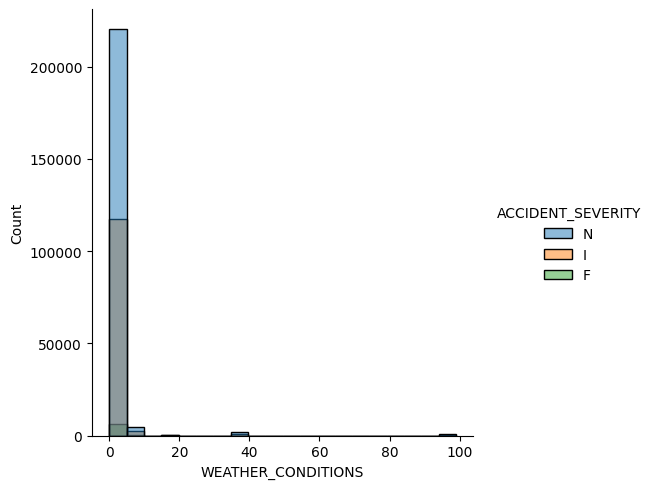

In [ ]:
for year in df_:
  print('for year', year)
  sns.displot(data=df_[year], x="WEATHER_CONDITIONS", hue='ACCIDENT_SEVERITY')
  plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Accident Severity per Weather Condition for {year}.png')

  plt.show()

for year 2020


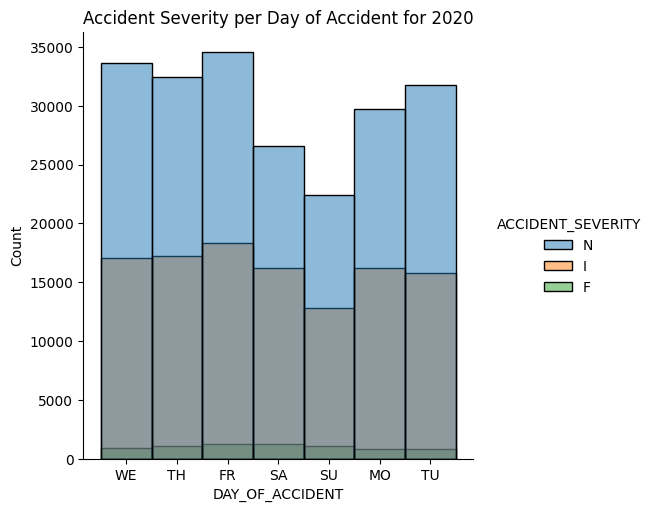

for year 2021


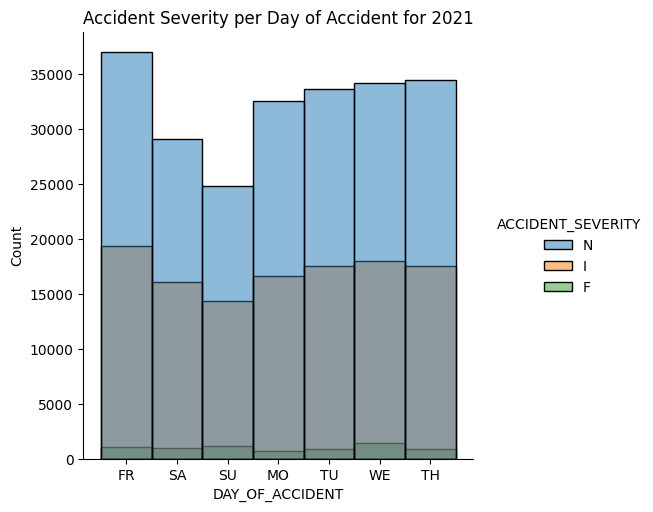

for year 2022


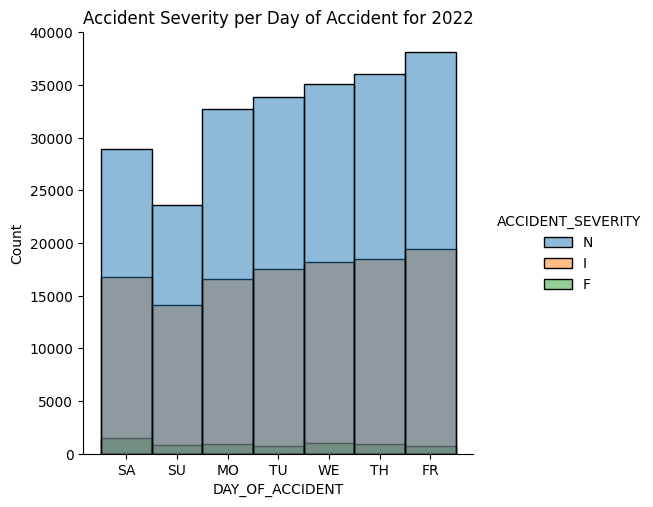

In [ ]:
for year in df_:
  print('for year', year)
  sns.displot(data=df_[year], x="DAY_OF_ACCIDENT", hue='ACCIDENT_SEVERITY')
  plt.title(f'Accident Severity per Day of Accident for {year}')
  plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Accident Severity per Day of Accident {year}.png')

  plt.show()

# Model Initialization

## Save as parquet files to quickly read back in as spark df

In [ ]:
# Aliyah
df_encoded_['2020'].to_parquet('/content/drive/MyDrive/Term Project CIS/FinalProj/2020_cleaned.parquet')
df_encoded_['2021'].to_parquet('/content/drive/MyDrive/Term Project CIS/FinalProj/2021_cleaned.parquet')
df_encoded_['2022'].to_parquet('/content/drive/MyDrive/Term Project CIS/FinalProj2022_cleaned.parquet')

In [ ]:
# Emma
df_encoded_['2020'].to_parquet('/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/2020_cleaned.parquet')
df_encoded_['2021'].to_parquet('/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/2021_cleaned.parquet')
df_encoded_['2022'].to_parquet('/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/2022_cleaned.parquet')

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=98ad5aef8f24d38ec96950d5e2a20b5114561e1120f3472de384b1d368ff243d
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.sql.types import StructType

spark = SparkSession.builder.appName("classification").getOrCreate()

In [5]:
spark_df_2020 = spark.read.parquet('/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/2020_cleaned.parquet')
spark_df_2020.show()

+------------+-------------------+----------------+-------------------+--------+--------------------+---------------+----------------+------------------+-----------------+---------------+-------------------------+------------+-----------------+----+----------------------+---------------------+--------------------+--------------------+---------------------+----------------------+---------------------+---------------------+--------------------+----------------------+--------------------+----------------------+--------------------+----------------------+--------------------+--------------------+--------------------+---------------------+----------------------+---------------------+---------------------+----------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+-------------

In [6]:
spark_df_2021 = spark.read.parquet('/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/2021_cleaned.parquet')
spark_df_2021.show()

+------------+-------------------+----------------+-------------------+--------+--------------------+---------------+----------------+------------------+-----------------+---------------+-------------------------+------------+-----------------+----+----------------------+---------------------+--------------------+--------------------+---------------------+----------------------+---------------------+---------------------+--------------------+--------------------+----------------------+--------------------+---------------------+--------------------+----------------------+--------------------+--------------------+--------------------+---------------------+----------------------+----------------------+---------------------+--------------------+---------------------+----------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+-----------------------+----------------------+----------------------+------------------

In [7]:
spark_df_2022 = spark.read.parquet('/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/2022_cleaned.parquet')
spark_df_2022.show()

+------------+-------------------+----------------+-------------------+--------+--------------------+---------------+----------------+------------------+-----------------+---------------+-------------------------+------------+-----------------+----+----------------------+---------------------+--------------------+--------------------+----------------------+---------------------+---------------------+---------------------+--------------------+----------------------+--------------------+----------------------+--------------------+---------------------+--------------------+----------------------+--------------------+--------------------+--------------------+---------------------+----------------------+---------------------+---------------------+----------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+-----------------------+----------------------+----------------------+----------------------+----------------

# Initial Models

- using MLlib for model training and testing predictions
- using pandas in sklearn for confusion matricies
- using  and seaborn to

In [23]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import seaborn as sns

def classification_init(df):
  feature_columns = [column for column in df.columns if column not in ['ACCIDENT_SEVERITY', 'ACCIDENT_KEY', 'year']]

  assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
  df_transformed = assembler.transform(df)
  df_transformed = df_transformed.select('features', 'ACCIDENT_SEVERITY')

  train_data, test_data = df_transformed.randomSplit([0.8, 0.2], seed=42)

  # Define the models
  models = {
      "Decision Tree Classifier": DecisionTreeClassifier(featuresCol='features', labelCol='ACCIDENT_SEVERITY'),
      "Random Forest Classifier": RandomForestClassifier(featuresCol='features', labelCol='ACCIDENT_SEVERITY'),
      "Naive Bayes": NaiveBayes(featuresCol='features', labelCol='ACCIDENT_SEVERITY')
  }

  # Define evaluators
  evaluator_accuracy = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol='ACCIDENT_SEVERITY', metricName="accuracy")
  evaluator_f1 = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol='ACCIDENT_SEVERITY', metricName="f1")

  test_predictions_dfs = {}
  train_predictions_dfs = {}
  results = {}
  for model_name, model in models.items():

      model_fit = model.fit(train_data)
      test_results = model_fit.transform(test_data)
      train_results = model_fit.transform(train_data)

      ################################# Confusion Matricies #################################

      # Save predictions to create confusion matrix
      test_predictions = test_results.select("prediction", "ACCIDENT_SEVERITY").withColumnRenamed("prediction", "predicted_label")
      train_predictions = train_results.select("prediction", "ACCIDENT_SEVERITY").withColumnRenamed("prediction", "predicted_label")

      # Convert to Pandas DataFrame for creating confusion matrix
      test_predictions_pd = test_predictions.toPandas()
      train_predictions_pd = train_predictions.toPandas()

      # Create confusion matrix
      confusion_matrix_test = test_predictions_pd.groupby(["predicted_label", "ACCIDENT_SEVERITY"]).size().unstack(fill_value=0)
      confusion_matrix_train = train_predictions_pd.groupby(["predicted_label", "ACCIDENT_SEVERITY"]).size().unstack(fill_value=0)

      # Create and plot confusion matrix for test data
      plt.figure(figsize=(6, 6))
      sns.heatmap(confusion_matrix_test, annot=True, fmt=".0f", square=True, cmap='Reds')
      plt.title(f"{model_name}: Test Confusion Matrix")
      plt.ylabel('Actual label')
      plt.xlabel('Predicted label')
      plt.show()

      # Create and plot confusion matrix for train data
      plt.figure(figsize=(8, 8))
      sns.heatmap(confusion_matrix_train, annot=True, fmt=".0f", square=True, cmap='Blues')
      plt.title(f"{model_name}: Train Confusion Matrix")
      plt.ylabel('Actual label')
      plt.xlabel('Predicted label')
      plt.show()

      ################################# Evaluation Metrics #################################

      # Compute accuracy and F1 score
      accuracy = evaluator_accuracy.evaluate(test_results)
      f1 = evaluator_f1.evaluate(test_results)
      accuracy_train = evaluator_accuracy.evaluate(train_results)
      f1_train = evaluator_f1.evaluate(train_results)

      # Print evaluation metrics
      print(f"{model_name}: Train Accuracy = {accuracy_train}, Train F1 = {f1_train}")
      print(f"{model_name}: Test Accuracy = {accuracy}, Test F1 = {f1}")

      ################################# Save Model Data #################################

      results[model_name] = {
            'test_predictions': test_predictions_pd,
            'train_predictions': train_predictions_pd,
            'test_confusion_matrix': confusion_matrix_test,
            'train_confusion_matrix': confusion_matrix_train,
            'test_accuracy': accuracy,
            'train_accuracy': accuracy_train,
            'test_f1': f1,
            'train_f1': f1_train
        }

  return results


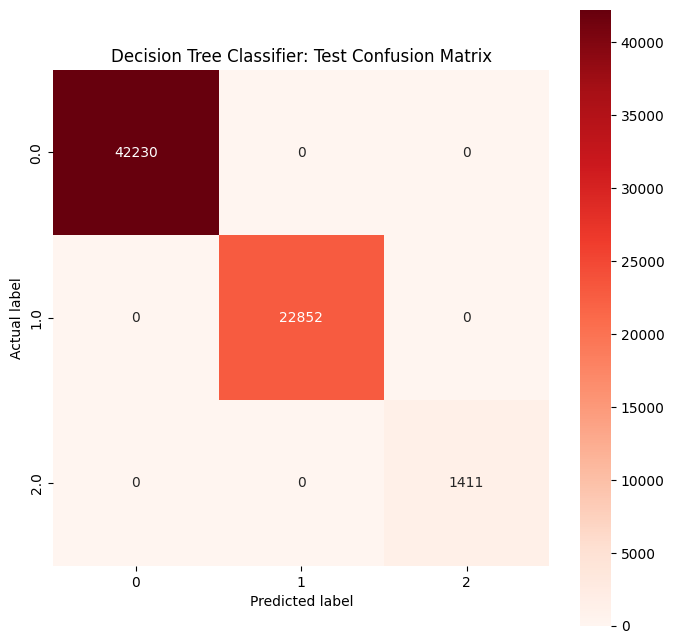

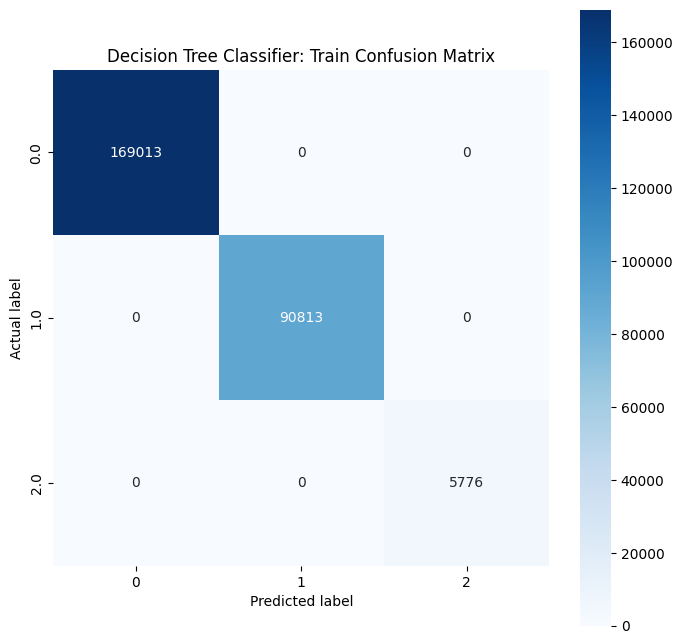

Decision Tree Classifier: Train Accuracy = 1.0, Train F1 = 1.0
Decision Tree Classifier: Test Accuracy = 1.0, Test F1 = 1.0


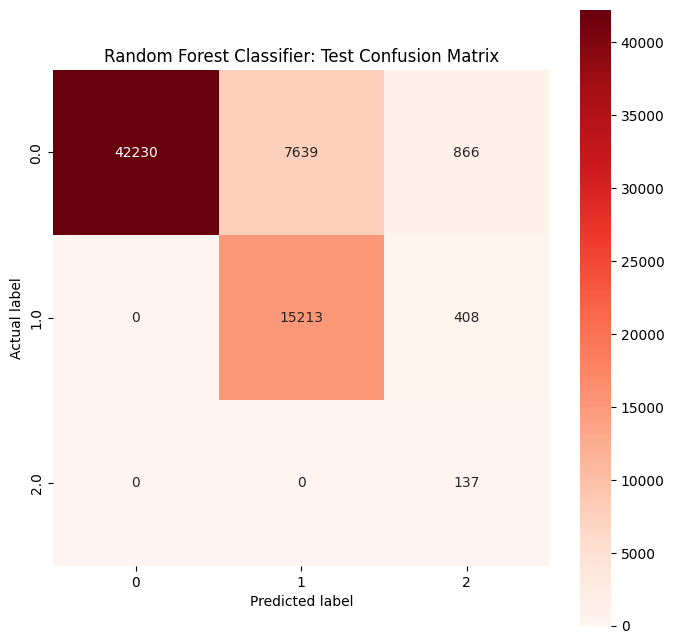

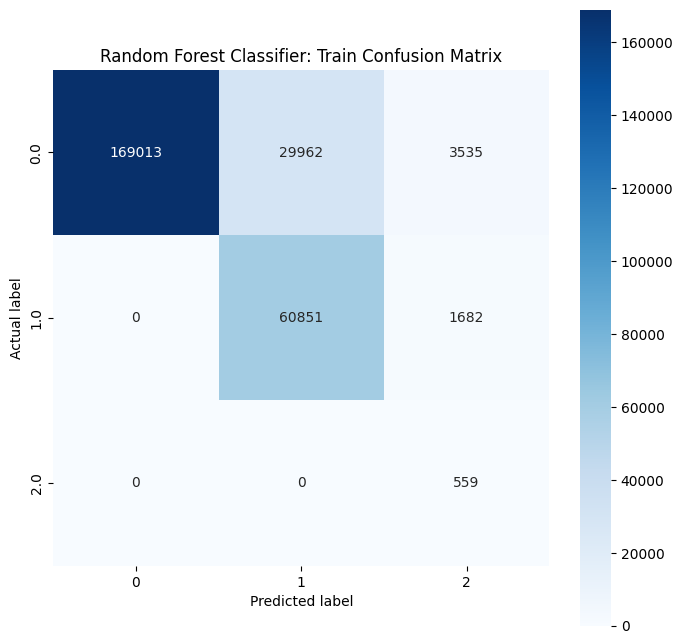

Random Forest Classifier: Train Accuracy = 0.8675499431480185, Train F1 = 0.8541615964734635
Random Forest Classifier: Test Accuracy = 0.8659558148978088, Test F1 = 0.8525495654584284


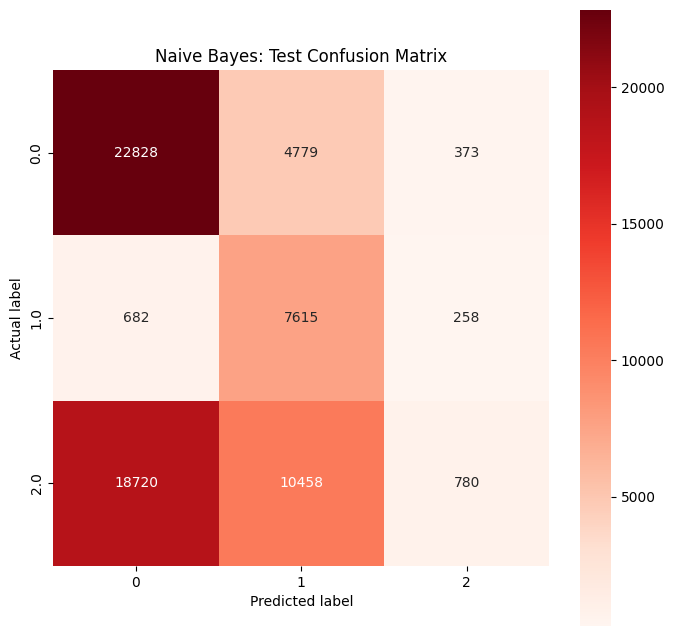

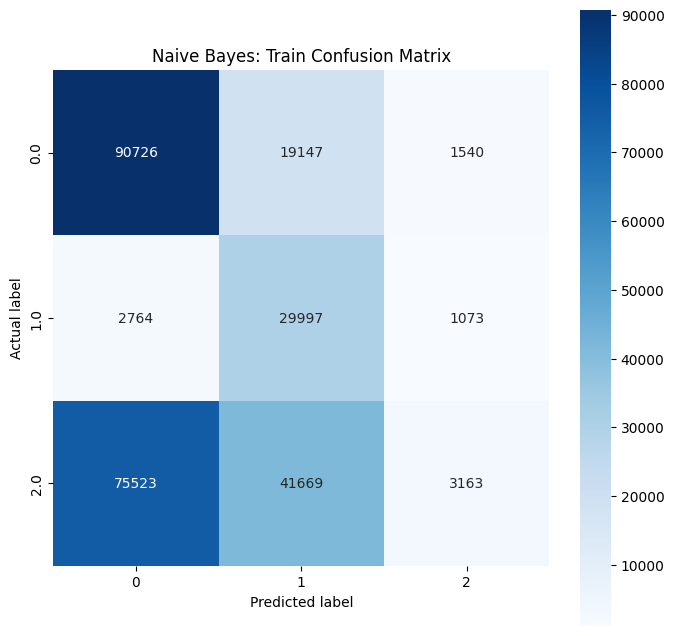

Naive Bayes: Train Accuracy = 0.46643474070225377, Train F1 = 0.5774063779884162
Naive Bayes: Test Accuracy = 0.4695682252267156, Test F1 = 0.5807058814521877


In [9]:
results_2020 = classification_init(spark_df_2020)

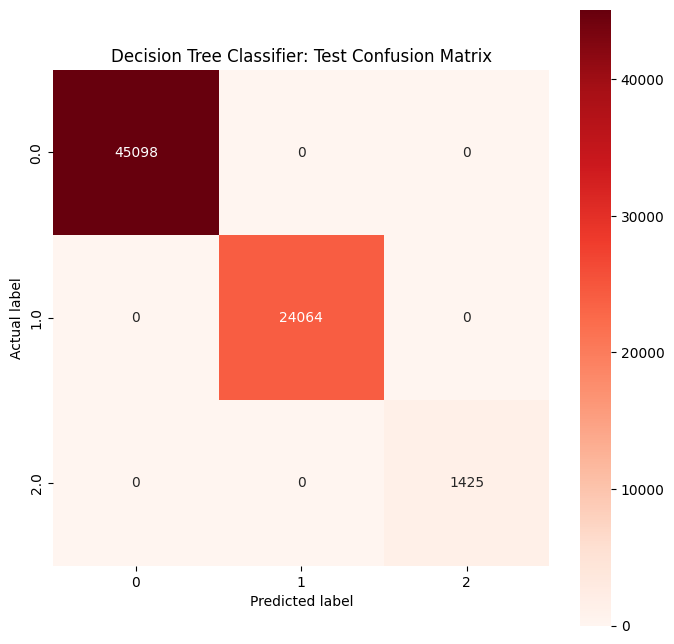

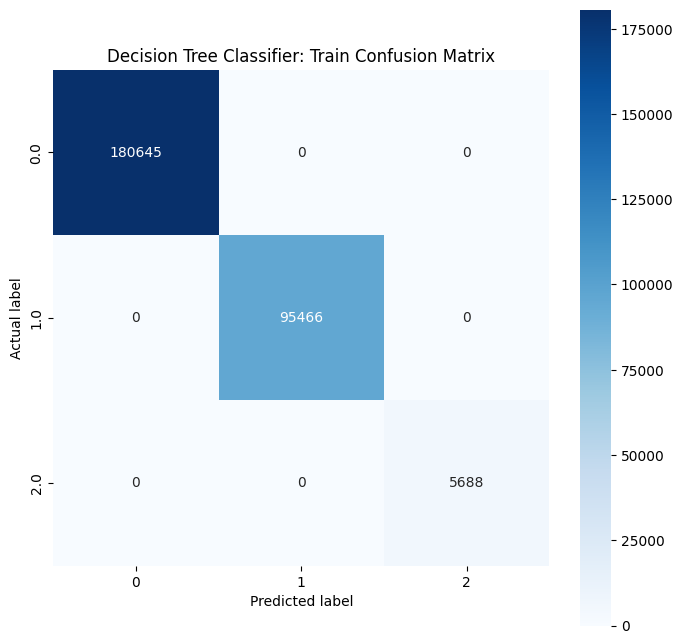

Decision Tree Classifier: Train Accuracy = 1.0, Train F1 = 1.0
Decision Tree Classifier: Test Accuracy = 1.0, Test F1 = 1.0


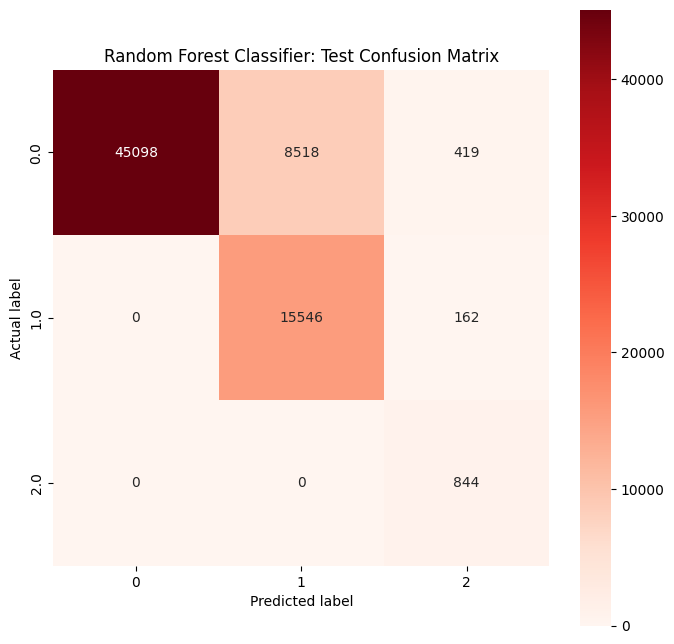

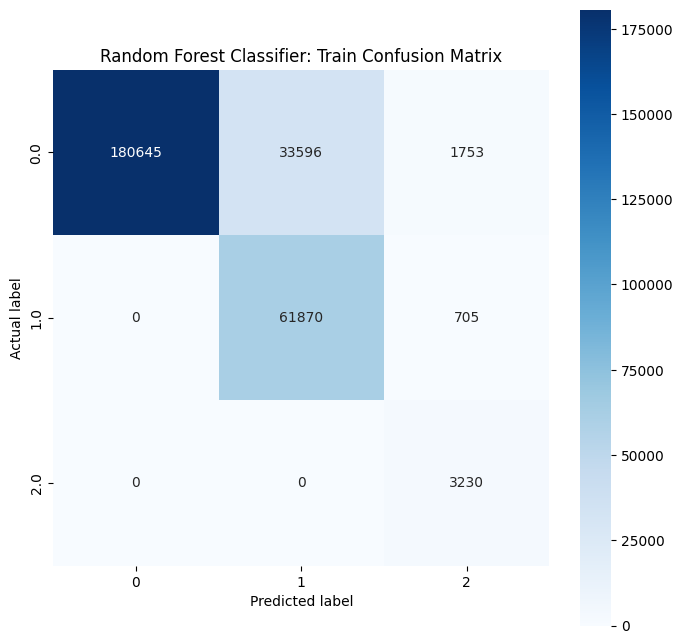

Random Forest Classifier: Train Accuracy = 0.8720577432851074, Train F1 = 0.8637792424383659
Random Forest Classifier: Test Accuracy = 0.8710952441667729, Test F1 = 0.8628307433941815


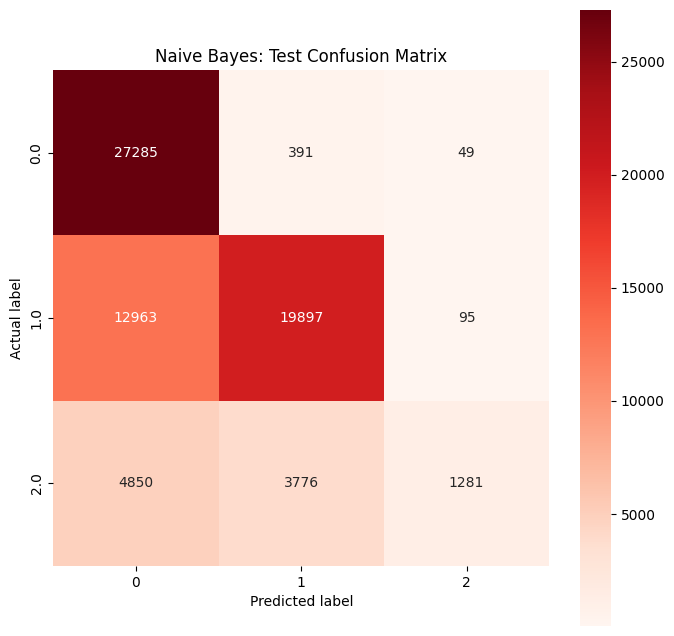

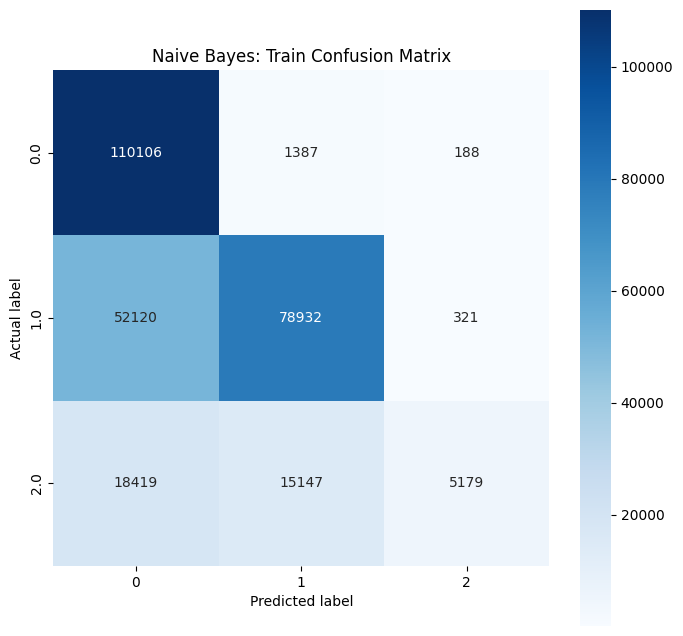

Naive Bayes: Train Accuracy = 0.6892040071114518, Train F1 = 0.7233709414167153
Naive Bayes: Test Accuracy = 0.6865711816623458, Test F1 = 0.7212498319409211


In [ ]:
results_2021 = classification_init(spark_df_2021)

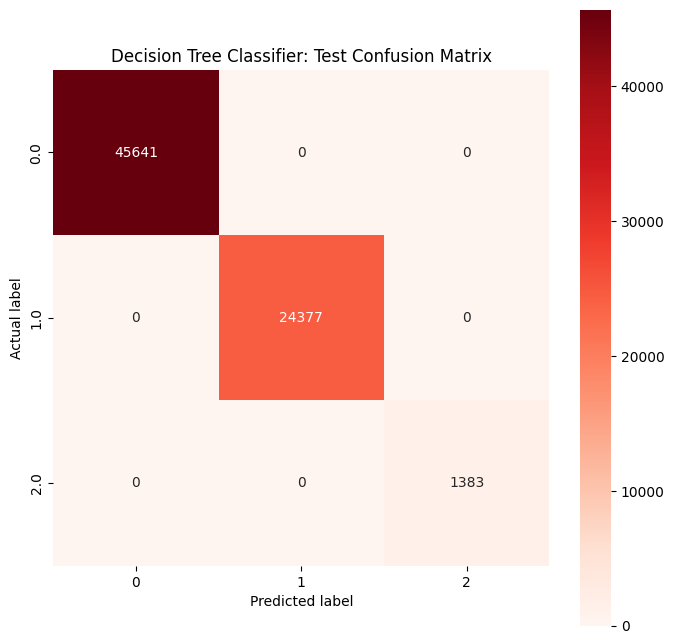

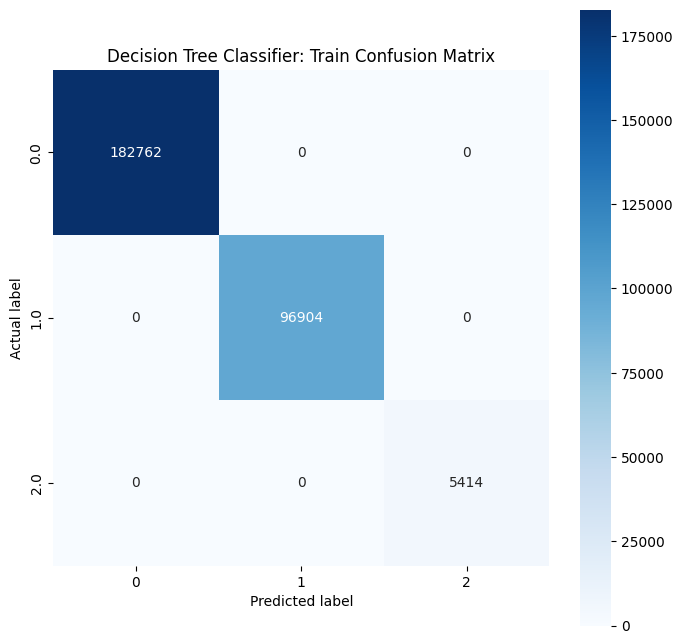

Decision Tree Classifier: Train Accuracy = 1.0, Train F1 = 1.0
Decision Tree Classifier: Test Accuracy = 1.0, Test F1 = 1.0


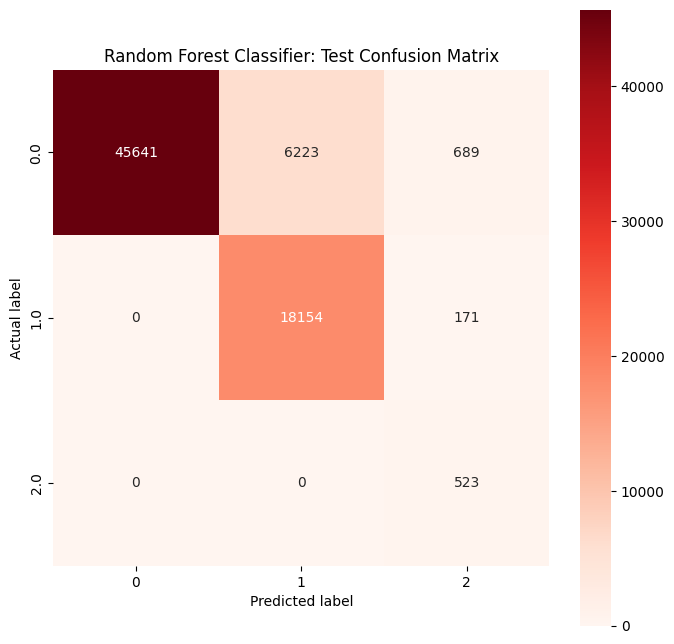

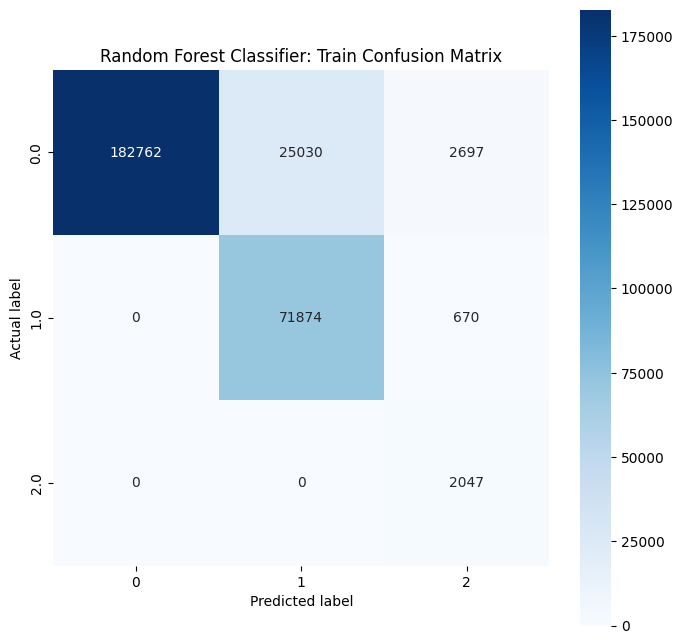

Random Forest Classifier: Train Accuracy = 0.9003893643889435, Train F1 = 0.8946731372348078
Random Forest Classifier: Test Accuracy = 0.9007997086875534, Test F1 = 0.8951436826174015


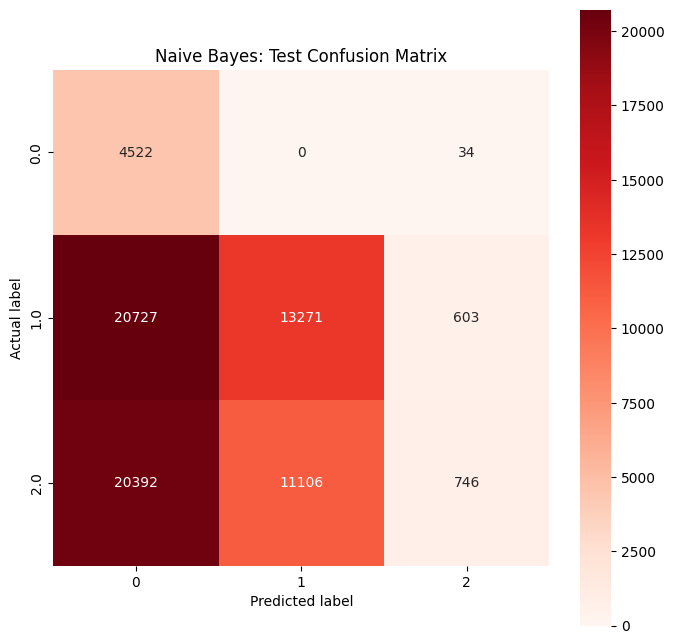

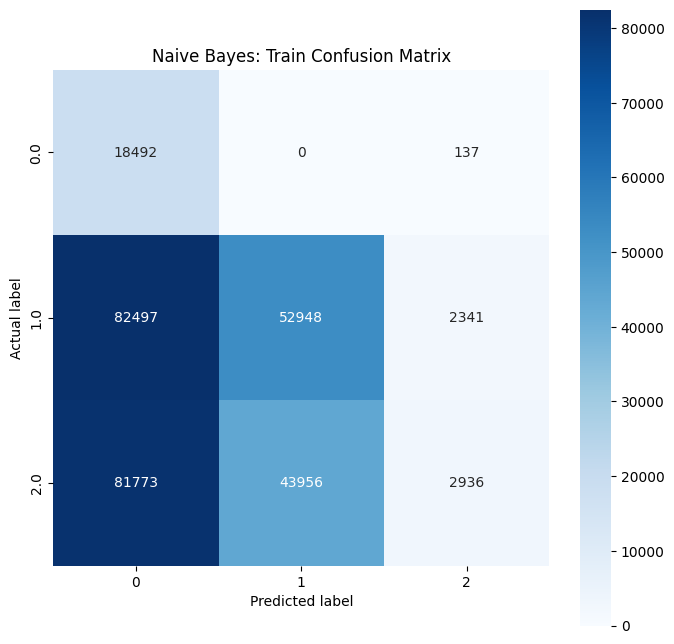

Naive Bayes: Train Accuracy = 0.26089518731584116, Train F1 = 0.27194018885042515
Naive Bayes: Test Accuracy = 0.2596462234422487, Test F1 = 0.2696732914186256


In [ ]:
results_2022 = classification_init(spark_df_2022)

## Cross-Fold Validation for Random Forest

In [ ]:
# cross-fold validation packages
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# standardized models packages
from pyspark.ml.feature import StandardScaler


In [26]:
def crossval(df):
    features_col = [column for column in df.columns if column not in ['ACCIDENT_SEVERITY', 'ACCIDENT_KEY', 'year']]

    assembler = VectorAssembler(inputCols=features_col, outputCol="features")
    df_trans = assembler.transform(df).select('features', 'ACCIDENT_SEVERITY')

    train_data, test_data = df_trans.randomSplit([0.8, 0.2], seed=42)

    rf = RandomForestClassifier(featuresCol='features', labelCol='ACCIDENT_SEVERITY')
    evaluator = MulticlassClassificationEvaluator(labelCol='ACCIDENT_SEVERITY', metricName='accuracy')

    ################################## Cross Validation ##################################

    paramGrid = (ParamGridBuilder()
                 .addGrid(rf.numTrees, [10, 20])
                 .addGrid(rf.maxDepth, [5, 7])
                 .build())

    cv = CrossValidator(estimator=rf,
                        estimatorParamMaps=paramGrid,
                        evaluator=evaluator,
                        numFolds=3)

    cvModel = cv.fit(train_data)
    predictions = cvModel.transform(test_data)

    accuracy = evaluator.evaluate(predictions)
    print("Accuracy:")
    print(accuracy)

    return cvModel


In [27]:
cv2020_model = crossval(spark_df_2020)

Accuracy:
0.921254868933572


In [28]:
cv2021_model = crossval(spark_df_2021)

Accuracy:
0.9864705965687733


In [29]:
cv2022_model = crossval(spark_df_2022)

Accuracy:
0.9623114522205571


In [37]:
def dt_crossval(df):
  features_col = [column for column in df.columns if column not in ['ACCIDENT_SEVERITY', 'ACCIDENT_KEY', 'year']]

  assembler = VectorAssembler(inputCols=features_col, outputCol="features")
  df_trans = assembler.transform(df).select('features', 'ACCIDENT_SEVERITY')

  train_data, test_data = df_trans.randomSplit([0.8, 0.2], seed=42)

  dt = DecisionTreeClassifier(featuresCol='features', labelCol='ACCIDENT_SEVERITY')
  evaluator = MulticlassClassificationEvaluator(labelCol='ACCIDENT_SEVERITY', metricName='accuracy')

  paramGrid = (ParamGridBuilder()
              .addGrid(dt.maxDepth, [5, 10])
              .addGrid(dt.maxBins, [32, 40])
              .build())

  ################################## Cross Validation #################################

  cv = CrossValidator(estimator=dt,
                      estimatorParamMaps=paramGrid,
                      evaluator=evaluator,
                      numFolds=3)

  cvModel = cv.fit(train_data)
  predictions = cvModel.transform(test_data)

  accuracy = evaluator.evaluate(predictions)
  print("Accuracy:")
  print(accuracy)

  return cvModel

In [38]:
cv2020_DTmodel = dt_crossval(spark_df_2020)

Accuracy:
1.0


In [39]:
cv2021_DTmodel = dt_crossval(spark_df_2021)

Accuracy:
1.0


In [40]:
cv2022_DTmodel = dt_crossval(spark_df_2022)

Accuracy:
1.0


## Visualizing test accuracies and F1 Scores

In [ ]:
acc_20_nb = results_2020['Naive Bayes']['test_accuracy']
acc_21_nb = results_2021['Naive Bayes']['test_accuracy']
acc_22_nb = results_2022['Naive Bayes']['test_accuracy']
print(round(acc_20_nb, 4), round(acc_21_nb, 4), round(acc_22_nb, 4))

0.4696 0.6866 0.2596


In [ ]:
f1_20_nb = results_2020['Naive Bayes']['test_f1']
f1_21_nb = results_2021['Naive Bayes']['test_f1']
f1_22_nb = results_2022['Naive Bayes']['test_f1']
print(round(f1_20_nb, 4), round(f1_21_nb, 4), round(f1_22_nb, 4))

0.5807 0.7212 0.2697


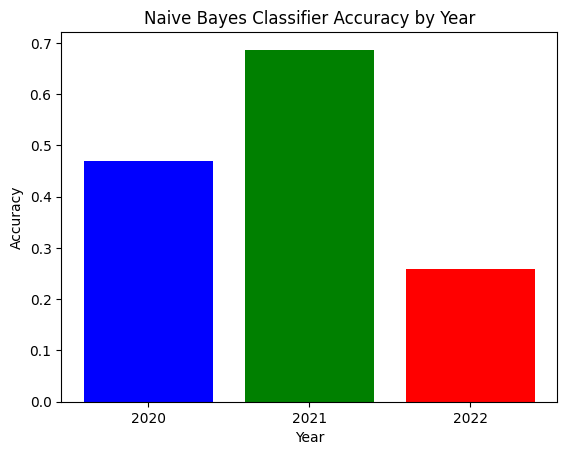

In [ ]:
years = ['2020', '2021', '2022']

accuracies = [acc_20_nb, acc_21_nb, acc_22_nb]

plt.bar(years, accuracies, color=['blue', 'green', 'red'])
plt.title('Naive Bayes Classifier Accuracy by Year')
plt.xlabel('Year')
plt.ylabel('Accuracy')
plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Naive Bayes Accuracies.png')

plt.show()

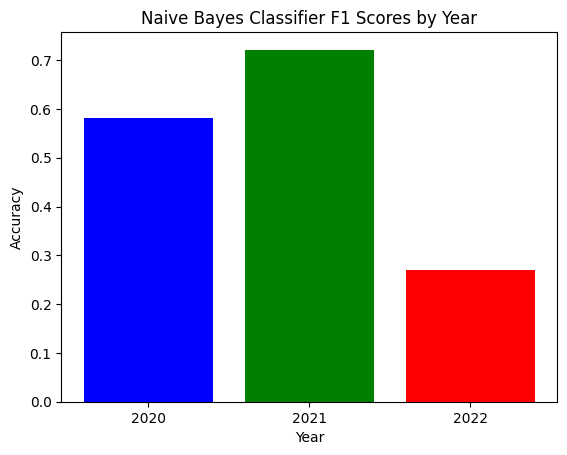

In [ ]:
accuracies = [f1_20_nb, f1_21_nb, f1_22_nb]

plt.bar(years, accuracies, color=['blue', 'green', 'red'])

plt.title('Naive Bayes Classifier F1 Scores by Year')
plt.xlabel('Year')
plt.ylabel('Accuracy')
plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Naive Bayes F1 Scores.png')

plt.show()

In [ ]:
acc_20 = results_2020['Random Forest Classifier']['test_accuracy']
acc_21 = results_2021['Random Forest Classifier']['test_accuracy']
acc_22 = results_2022['Random Forest Classifier']['test_accuracy']
print(round(acc_20, 4), round(acc_21, 4), round(acc_22, 4))

0.9581 0.8711 0.9008


In [ ]:
f1_20 = results_2020['Random Forest Classifier']['test_f1']
f1_21 = results_2021['Random Forest Classifier']['test_f1']
f1_22 = results_2022['Random Forest Classifier']['test_f1']
print(round(f1_20, 4), round(f1_21, 4), round(f1_22, 4))

0.9525 0.8628 0.8951


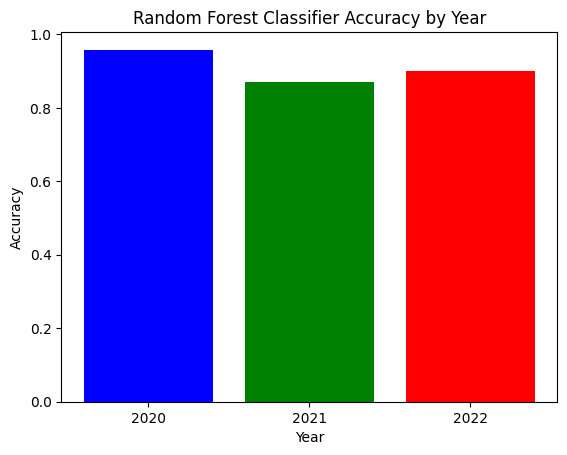

In [ ]:
years = ['2020', '2021', '2022']

accuracies = [acc_20, acc_21, acc_22]
plt.bar(years, accuracies, color=['blue', 'green', 'red'])
plt.title('Random Forest Classifier Accuracy by Year')
plt.xlabel('Year')
plt.ylabel('Accuracy')
#plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Random Forest Accuracies.png')

plt.show()

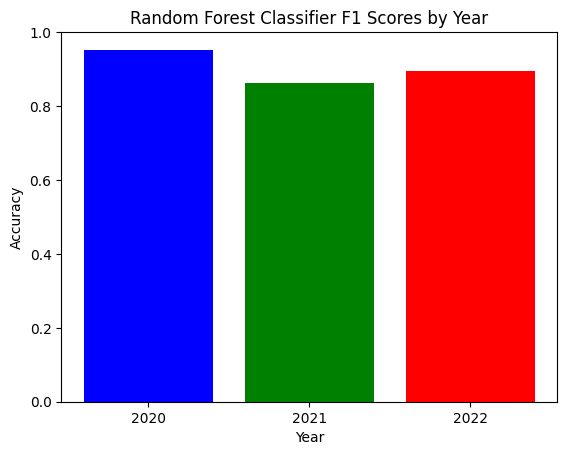

In [ ]:
years = ['2020', '2021', '2022']

accuracies = [f1_20, f1_21, f1_22]
plt.bar(years, accuracies, color=['blue', 'green', 'red'])
plt.title('Random Forest Classifier F1 Scores by Year')
plt.xlabel('Year')
plt.ylabel('Accuracy')
plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Random Forest F1 Scores.png')

plt.show()

# Models using Standardized Data

- Only used standardized data in Random Forest model


In [10]:
# Initialize the standard scaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

def classification_std(df):
  feature_columns = [column for column in df.columns if column not in ['ACCIDENT_SEVERITY', 'ACCIDENT_KEY', 'year']]

  assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
  df_transformed = assembler.transform(df)
  df_transformed = df_transformed.select('features', 'ACCIDENT_SEVERITY')
  scalerModel = scaler.fit(df_transformed)
  normal_df = scalerModel.transform(df_transformed)

  train_data, test_data = normal_df.randomSplit([0.8, 0.2], seed=42)

  # Define the models
  models = {
      "Random Forest Classifier": RandomForestClassifier(featuresCol='features', labelCol='ACCIDENT_SEVERITY'),
  }

  # Define evaluators
  evaluator_accuracy = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol='ACCIDENT_SEVERITY', metricName="accuracy")
  evaluator_f1 = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol='ACCIDENT_SEVERITY', metricName="f1")

  test_predictions_dfs = {}
  train_predictions_dfs = {}
  results = {}
  for model_name, model in models.items():
      # Fit the model
      model_fit = model.fit(train_data)

      # Predict on train and test data
      test_results = model_fit.transform(test_data)
      train_results = model_fit.transform(train_data)

      # Save predictions to create confusion matrix
      test_predictions = test_results.select("prediction", "ACCIDENT_SEVERITY").withColumnRenamed("prediction", "predicted_label")
      train_predictions = train_results.select("prediction", "ACCIDENT_SEVERITY").withColumnRenamed("prediction", "predicted_label")

      # Convert to Pandas DataFrame for creating confusion matrix
      test_predictions_pd = test_predictions.toPandas()
      train_predictions_pd = train_predictions.toPandas()

      # Create confusion matrix
      confusion_matrix_test = test_predictions_pd.groupby(["predicted_label", "ACCIDENT_SEVERITY"]).size().unstack(fill_value=0)
      confusion_matrix_train = train_predictions_pd.groupby(["predicted_label", "ACCIDENT_SEVERITY"]).size().unstack(fill_value=0)

      # Create and plot confusion matrix for test data
      plt.figure(figsize=(8, 8))
      sns.heatmap(confusion_matrix_test, annot=True, fmt=".0f", square=True, cmap='Reds')
      plt.title(f"{model_name}: Test Confusion Matrix")
      plt.ylabel('Actual label')
      plt.xlabel('Predicted label')
      plt.show()

      # Create and plot confusion matrix for train data
      plt.figure(figsize=(8, 8))
      sns.heatmap(confusion_matrix_train, annot=True, fmt=".0f", square=True, cmap='Blues')
      plt.title(f"{model_name}: Train Confusion Matrix")
      plt.ylabel('Actual label')
      plt.xlabel('Predicted label')
      plt.show()

      # Compute accuracy and F1 score
      accuracy = evaluator_accuracy.evaluate(test_results)
      f1 = evaluator_f1.evaluate(test_results)
      accuracy_train = evaluator_accuracy.evaluate(train_results)
      f1_train = evaluator_f1.evaluate(train_results)

      # Print evaluation metrics
      print(f"{model_name}: Train Accuracy = {accuracy_train}, Train F1 = {f1_train}")
      print(f"{model_name}: Test Accuracy = {accuracy}, Test F1 = {f1}")

      results[model_name] = {
            'test_predictions': test_predictions_pd,
            'train_predictions': train_predictions_pd,
            'test_confusion_matrix': confusion_matrix_test,
            'train_confusion_matrix': confusion_matrix_train,
            'test_accuracy': accuracy,
            'train_accuracy': accuracy_train,
            'test_f1': f1,
            'train_f1': f1_train
        }

  return results

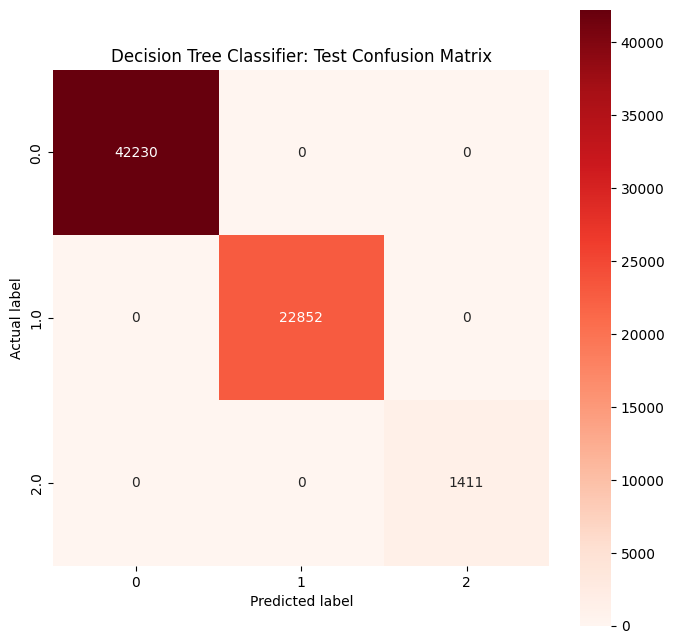

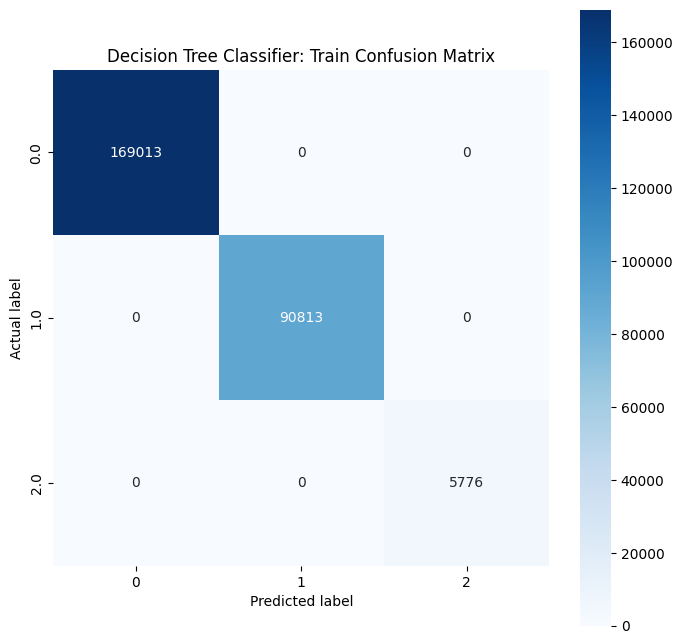

Decision Tree Classifier: Train Accuracy = 1.0, Train F1 = 1.0
Decision Tree Classifier: Test Accuracy = 1.0, Test F1 = 1.0


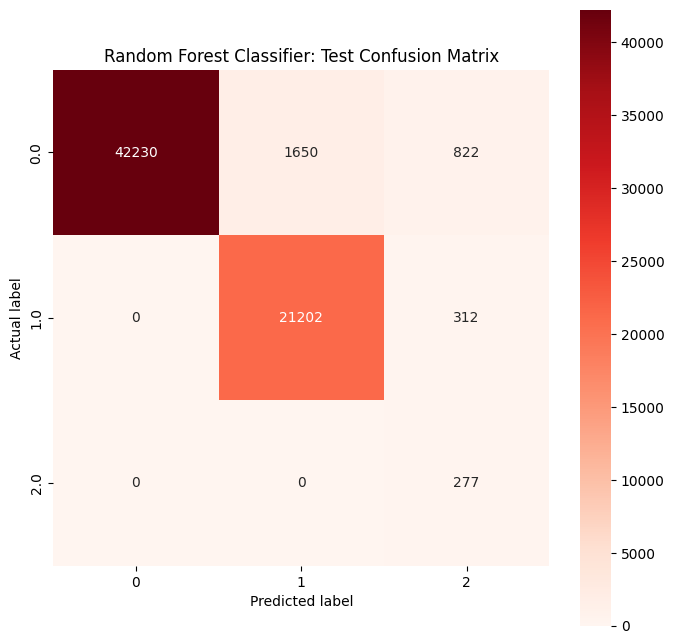

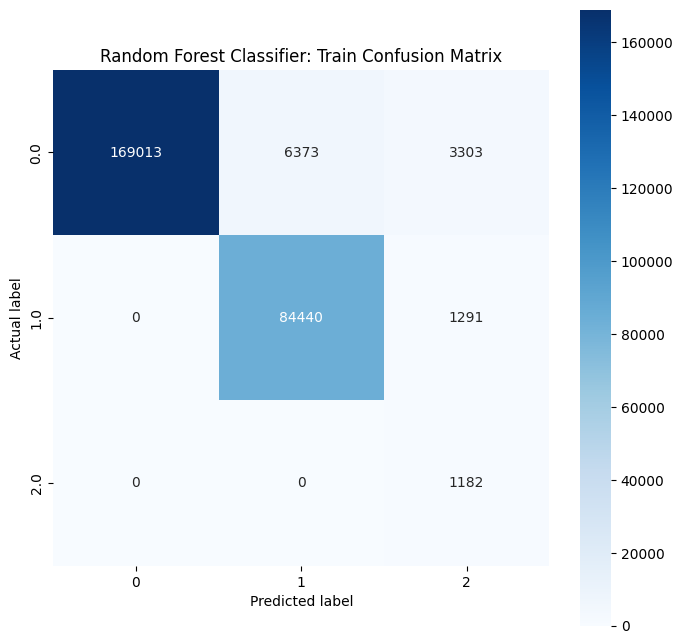

Random Forest Classifier: Train Accuracy = 0.9587088952643429, Train F1 = 0.9530904815220289
Random Forest Classifier: Test Accuracy = 0.9581309310754516, Test F1 = 0.952485984375379


In [ ]:
norm_2020_results = classification_std(spark_df_2020)

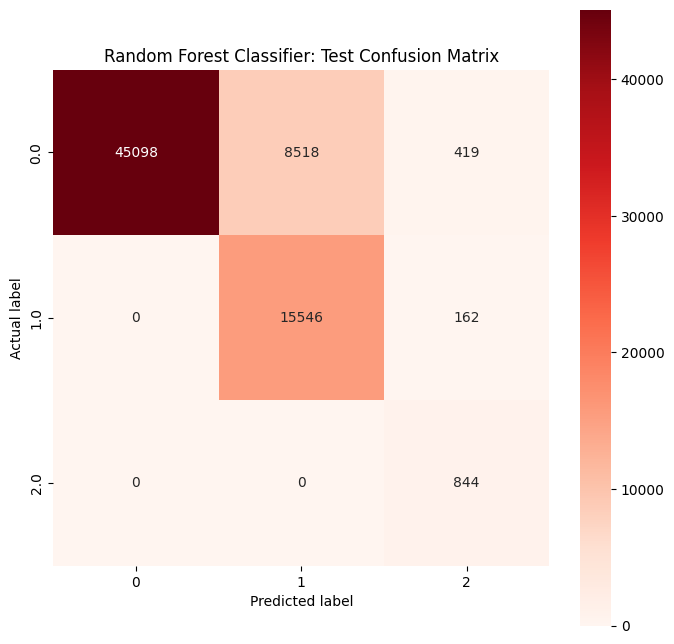

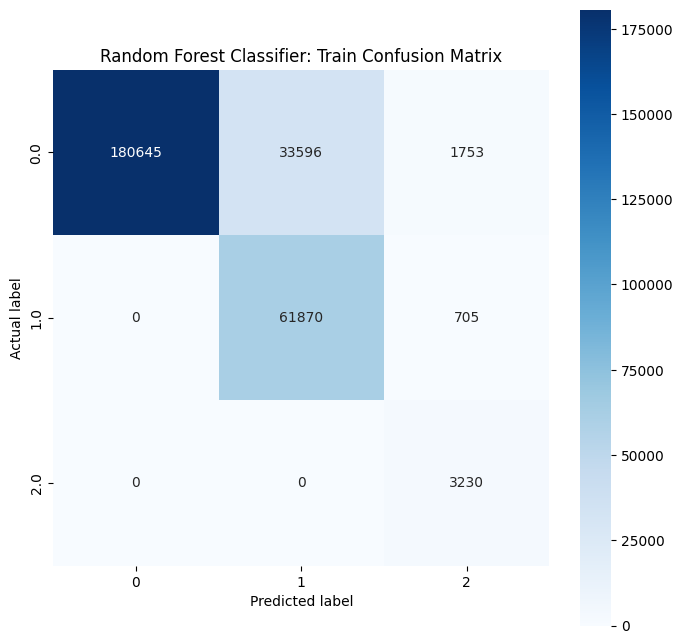

Random Forest Classifier: Train Accuracy = 0.8720577432851074, Train F1 = 0.8637792424383659
Random Forest Classifier: Test Accuracy = 0.8710952441667729, Test F1 = 0.8628307433941815


In [ ]:
norm_2021_results = classification_std(spark_df_2021)

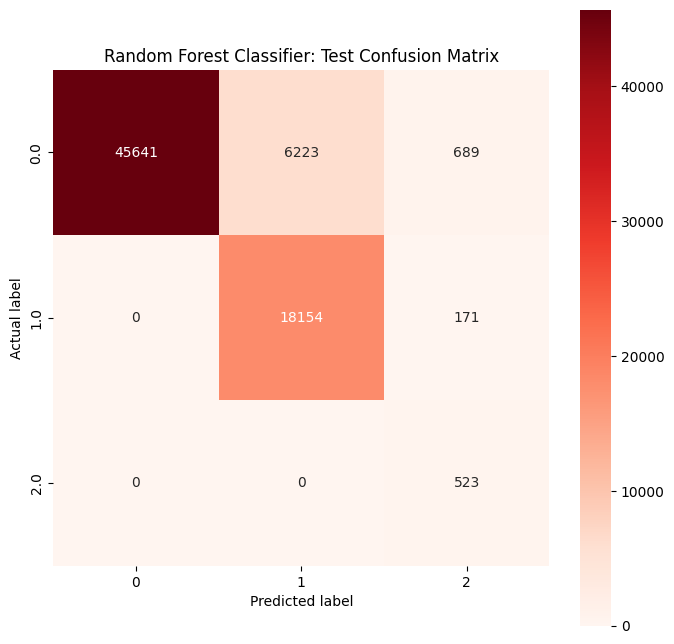

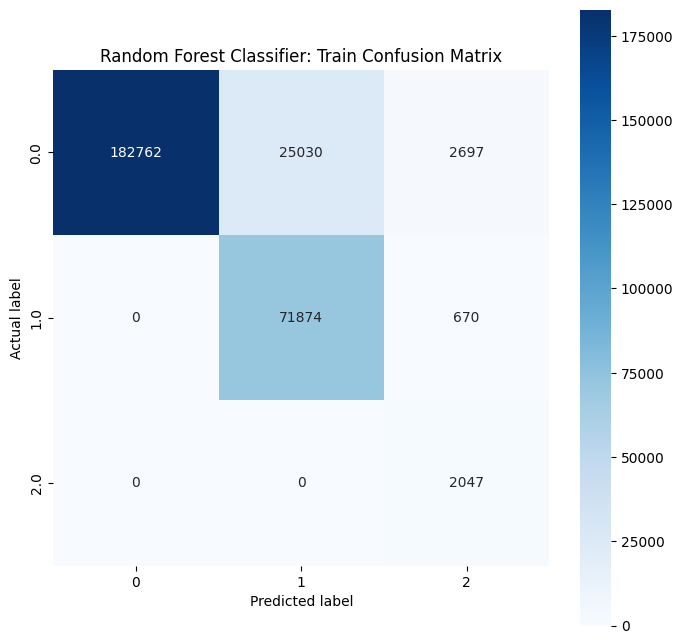

Random Forest Classifier: Train Accuracy = 0.9003893643889435, Train F1 = 0.8946731372348078
Random Forest Classifier: Test Accuracy = 0.9007997086875534, Test F1 = 0.8951436826174015


In [ ]:
norm_2022_results = classification_std(spark_df_2022)

## Visualizing test accuracies and F1 Scores

In [ ]:
acc_20_norm = norm_2020_results['Random Forest Classifier']['test_accuracy']
acc_21_norm = norm_2021_results['Random Forest Classifier']['test_accuracy']
acc_22_norm = norm_2022_results['Random Forest Classifier']['test_accuracy']
print(round(acc_20_norm, 4), round(acc_21_norm, 4), round(acc_22_norm, 4))

0.9581 0.8711 0.9008


In [ ]:
f1_20_norm = norm_2020_results['Random Forest Classifier']['test_f1']
f1_21_norm = norm_2021_results['Random Forest Classifier']['test_f1']
f1_22_norm = norm_2022_results['Random Forest Classifier']['test_f1']
print(round(f1_20_norm, 4), round(f1_21_norm, 4), round(f1_22_norm, 4))

0.9525 0.8628 0.8951


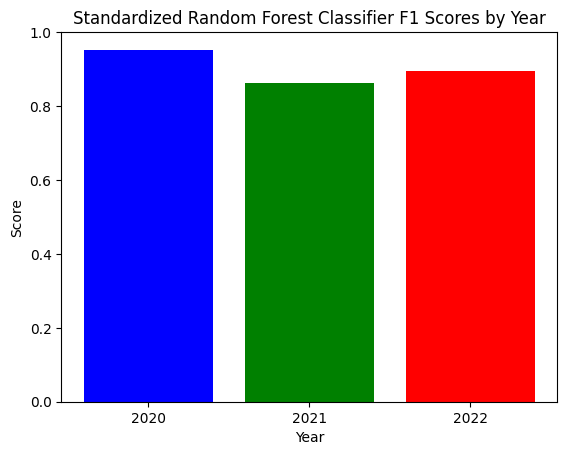

In [ ]:
accuracies = [f1_20_norm, f1_21_norm, f1_22_norm]

# Creating the bar plot
plt.bar(years, accuracies, color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Standardized Random Forest Classifier F1 Scores by Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Standardized Random Forest F1 Scores.png')

# Display the plot
plt.show()

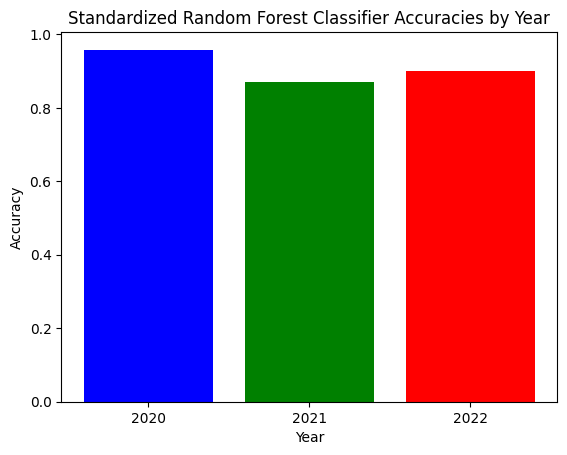

In [ ]:
accuracies = [acc_20_norm, acc_21_norm, acc_22_norm]

# Creating the bar plot
plt.bar(years, accuracies, color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Standardized Random Forest Classifier Accuracies by Year')
plt.xlabel('Year')
plt.ylabel('Accuracy')
plt.savefig(f'/content/drive/MyDrive/MSDA Masters Folders/CIS_731/FinalProj/Plot of Standardized Random Forest Accuracy.png')

# Display the plot
plt.show()